### 계획

0. data 정리
- col에 대한 설명 적기
- info(),shape 살펴보기

1. EDA
<br>

- 결측치 확인
    - 어떤 값으로 결측값 넣어줄지 정하기 
- 영화 제목 중복됬는지 확인
    - 처음에 나온것을 기준으로 분석할것이기 때문에 재개봉한 작품은 데이터에서 제외
- label encoder
    - obj >> float/int

- features와 label 나누기
- label 히스토그램 만들기
- features와 label 사이의 상관 관계 확인 하기
    - corr(), pairplot(), heatmap()

- label을 제외한 features의 분포 확인하기
    - boxplot 확인
    - scaling 해보기

2. machine learning 
- 알고리즘 (linear regression) 
- 성능 확인하기
- 영화에 다른 감독 넣어보기


In [128]:
import pandas as pd
import numpy as np

## 0. DATA 정리 (컬럼에 대한 설명, info() 확인하기)

In [130]:
all_movies = pd.read_excel('./all_movies.xlsx', index_col=0)
all_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2247 entries, 0 to 446
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순위       2247 non-null   int64         
 1   영화명      2247 non-null   object        
 2   개봉일      2246 non-null   datetime64[ns]
 3   매출액      2247 non-null   int64         
 4   매출액 점유율  2247 non-null   object        
 5   관객수      2247 non-null   int64         
 6   스크린수     2247 non-null   int64         
 7   상영횟수     2247 non-null   int64         
 8   대표국적     2247 non-null   object        
 9   국적       2247 non-null   object        
 10  배급사      2245 non-null   object        
 11  연령등급     2246 non-null   object        
 12  장르       2247 non-null   object        
 13  러닝타임     2246 non-null   float64       
 14  감독       2247 non-null   object        
 15  개봉월      2246 non-null   float64       
 16  계절       2247 non-null   object        
dtypes: datetime64[ns](1), float64(2), 

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_31492\1613199063.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  all_movies = pd.read_excel('./all_movies.xlsx', index_col=0)


- 순위 = 영화관입장권 통합전산망에 의해 통계된 연도별 박스 오피스별 영화순위
- 매출액 점유율 = (해당 영화의)매출액 / (모든 영화의)전체 매출액
- 국적 = 영화의 국적은 당연히 만들어진 주체에 있으며, 어느나라에서 만들어졌고, 
누가 만들었고, 어떤 자본을 투자 해서 만들어졌고, 누구를 대상으로 서비스 되는가가
영화의 국적을 결정한다. 예전에는 단일 관객, 단일국가로 벽을 치고 영화를 만드는게
가능했지만 지금 영화시장은 세계적으로 장벽이 허물어져 이런식의 구분이 무의미
현재는 그 영화가 갖고 있는 메세지, 정체성, 그 영화가 깔고 있는 문화적인 바탕이
어디에 있느냐가 기준이 되기도 함

- 대표국적 = 영화의 국적들중 대표로 선정된 국적

- 계절 = 영화 개봉월을 기준으로 
(봄: 3, 4, 5월
여름: 6, 7, 8월
가을: 9, 10, 11월
겨울: 12, 1, 2월)    로 나눔

In [131]:
all_movies.shape # row, col

(2247, 17)

--------------------
## 1.1 EDA 결측치 확인하기

In [132]:
all_movies.isnull().sum()

# 개봉일, 배급사 직접 찾음

순위         0
영화명        0
개봉일        1
매출액        0
매출액 점유율    0
관객수        0
스크린수       0
상영횟수       0
대표국적       0
국적         0
배급사        2
연령등급       1
장르         0
러닝타임       1
감독         0
개봉월        1
계절         0
dtype: int64

In [133]:
all_movies = all_movies.reset_index(drop=True)
all_movies

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,1,디워,2007-08-01,49339934700,0.1,7855441,622,96434,한국,한국,(주)쇼박스,12세 관람가,판타지,90.0,심형래,8.0,여름
1,2,트랜스포머,2007-06-28,47619379338,0.1,7389696,863,92291,미국,미국,CJ ENM,12세 관람가,SF,135.0,마이클 베이,6.0,여름
2,3,화려한 휴가,2007-07-25,44098449600,0.0,6855300,551,96522,한국,한국,CJ ENM,12세 관람가,드라마,125.0,김지훈,7.0,여름
3,4,스파이더맨 3,2007-05-01,29511658000,0.0,4592309,806,79966,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,SF,139.0,샘 레이미,5.0,봄
4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.0,4571229,953,78007,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,판타지,168.0,고어 버빈스키,5.0,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2242,146,부활,2020-07-09,77018250,0,9200,39,664,한국,한국,(주)중헌홀딩스,전체 관람가,다큐멘터리,99.0,케빈 레이놀즈,7.0,여름
2243,147,타락천사,1995-12-23,89708920,0,8983,37,728,홍콩,홍콩,(주)디스테이션,15세 관람가,드라마,99.0,왕가위,12.0,겨울
2244,148,테넷,2020-08-26,84602320,0,8957,32,1374,미국,미국,워너브러더스 코리아(주),12세 관람가,"액션, SF",150.0,크리스토퍼 놀란,8.0,여름
2245,149,유다 그리고 블랙 메시아,2021-04-22,75381330,0,8841,154,2032,미국,미국,워너브러더스 코리아(주),15세 관람가,드라마,125.0,샤카 킹,4.0,봄


In [134]:
# 러닝타임 결측치 
all_movies.loc[2001,'러닝타임'] =115.0
# 배급사 결측치
all_movies.loc[849,'배급사'] ='(주)NEW'
# 연령등급 결측치
all_movies.loc[1100,'연령등급'] ='15세 관람가'


In [135]:
# 뽀로로 극장판 눈요정 마을 대모험 은 배급사를 찾을 수 없어서 DROP 함
all_movies.drop(1149, axis=0, inplace=True)

In [136]:
# 결측치 재확인
all_movies.isnull().sum()

순위         0
영화명        0
개봉일        0
매출액        0
매출액 점유율    0
관객수        0
스크린수       0
상영횟수       0
대표국적       0
국적         0
배급사        0
연령등급       0
장르         0
러닝타임       0
감독         0
개봉월        0
계절         0
dtype: int64

---------------------
## 1.2 EDA 중복된 데이터 확인하기 
- '영화명'을 기준으로
- 우선, 중복된 영화가 몇개 있는지 확인


In [137]:
# df.duplicate() 메소드를 사용하여 첫번째 값을 두고 최신값들 모두 제거
# 재개봉한 영화들을 삭제해야하므로

all_movies[all_movies['영화명'].duplicated()] # 총 161개의 영화가 2회 이상 재개봉

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
211,62,황금 나침반,2007-12-18,3769841000,0.0,609371,293,19115,미국,미국,롯데쇼핑㈜롯데엔터테인먼트,전체 관람가,판타지,113.0,크리스 웨이츠,12.0,겨울
219,70,내셔널 트레져:비밀의 책,2007-12-19,3582870500,0.0,543996,264,14592,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,모험,124.0,존 터틀타웁,12.0,겨울
236,87,색즉시공 시즌2,2007-12-12,2034600000,0.0,299326,208,9466,한국,한국,CJ ENM,청소년 관람불가,코미디,115.0,윤태윤,12.0,겨울
242,93,어거스트 러쉬,2007-11-29,1787776500,0.0,271678,126,6631,미국,미국,"(주)영화사 그램,CJ ENM",전체 관람가,드라마,113.0,커스틴 쉐리단,11.0,가을
263,114,아메리칸 갱스터,2007-12-27,1315594500,0.0,191510,200,6267,미국,미국,유니버설픽쳐스인터내셔널 코리아(유),청소년 관람불가,범죄,156.0,리들리 스콧,12.0,겨울
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2231,135,호빗: 뜻밖의 여정,2012-12-13,126902600,0,11621,99,637,미국,"미국,뉴질랜드",워너브러더스 코리아(주),12세 관람가,"판타지, 모험",169.0,피터 잭슨,12.0,겨울
2233,137,페이트 스테이 나이트 헤븐즈필 제3장 스프링 송,2020-10-22,91472790,0,11236,38,922,일본,일본,(주)애니플러스,15세 관람가,"애니메이션, 액션, 판타지",122.0,스도 토모노리,10.0,가을
2239,143,팅커 테일러 솔저 스파이,2012-02-09,82005200,0,9584,146,1762,영국,"영국,프랑스,독일","(주)드림팩트엔터테인먼트,팝엔터테인먼트",15세 관람가,스릴러,127.0,토마스 알프레드슨,2.0,겨울
2242,146,부활,2020-07-09,77018250,0,9200,39,664,한국,한국,(주)중헌홀딩스,전체 관람가,다큐멘터리,99.0,케빈 레이놀즈,7.0,여름


In [138]:
# 중복 영화 확인하기 
all_movies[all_movies['영화명']=='부활']


,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
1457,108,부활,2016-03-17,1247191600,0.0,176122,136,8581,미국,미국,유니버설픽쳐스인터내셔널 코리아(유),12세 관람가,드라마,107.0,케빈 레이놀즈,3.0,봄
2069,121,부활,2020-07-09,113296500,0,14537,83,2019,한국,한국,(주)중헌홀딩스,전체 관람가,다큐멘터리,99.0,케빈 레이놀즈,7.0,여름
2242,146,부활,2020-07-09,77018250,0,9200,39,664,한국,한국,(주)중헌홀딩스,전체 관람가,다큐멘터리,99.0,케빈 레이놀즈,7.0,여름


In [139]:
# '영화명'의 중복 제거 하기

all_movies = all_movies.drop_duplicates('영화명') 

In [140]:
# 제거된 항목이 발생해서 인덱스 번호 재설정해주기
all_movies = all_movies.reset_index(drop=True)
all_movies

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,1,디워,2007-08-01,49339934700,0.1,7855441,622,96434,한국,한국,(주)쇼박스,12세 관람가,판타지,90.0,심형래,8.0,여름
1,2,트랜스포머,2007-06-28,47619379338,0.1,7389696,863,92291,미국,미국,CJ ENM,12세 관람가,SF,135.0,마이클 베이,6.0,여름
2,3,화려한 휴가,2007-07-25,44098449600,0.0,6855300,551,96522,한국,한국,CJ ENM,12세 관람가,드라마,125.0,김지훈,7.0,여름
3,4,스파이더맨 3,2007-05-01,29511658000,0.0,4592309,806,79966,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,SF,139.0,샘 레이미,5.0,봄
4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.0,4571229,953,78007,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,판타지,168.0,고어 버빈스키,5.0,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,144,잃어버린 얼굴 1895,2021-02-24,135487000,0,9558,63,1126,한국,한국,(재)서울예술단,전체 관람가,"뮤지컬, 공연실황",148.0,이지나,2.0,겨울
2081,145,브리짓 존스의 일기,2001-09-01,63593240,0,9295,69,708,영국,영국,"(주)제이앤씨미디어그룹,UIP코리아",15세 관람가,"멜로/로맨스, 코미디",107.0,샤론 맥과이어,9.0,가을
2082,147,타락천사,1995-12-23,89708920,0,8983,37,728,홍콩,홍콩,(주)디스테이션,15세 관람가,드라마,99.0,왕가위,12.0,겨울
2083,149,유다 그리고 블랙 메시아,2021-04-22,75381330,0,8841,154,2032,미국,미국,워너브러더스 코리아(주),15세 관람가,드라마,125.0,샤카 킹,4.0,봄


In [141]:
# list_no = all_movies.copy()
list_no

# list_no.to_excel('./all_movies_데이터 수정완료.xlsx')

NameError: name 'list_no' is not defined

In [129]:
all_movies = list_no.copy()

In [142]:
all_movies

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,1,디워,2007-08-01,49339934700,0.1,7855441,622,96434,한국,한국,(주)쇼박스,12세 관람가,판타지,90.0,심형래,8.0,여름
1,2,트랜스포머,2007-06-28,47619379338,0.1,7389696,863,92291,미국,미국,CJ ENM,12세 관람가,SF,135.0,마이클 베이,6.0,여름
2,3,화려한 휴가,2007-07-25,44098449600,0.0,6855300,551,96522,한국,한국,CJ ENM,12세 관람가,드라마,125.0,김지훈,7.0,여름
3,4,스파이더맨 3,2007-05-01,29511658000,0.0,4592309,806,79966,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,SF,139.0,샘 레이미,5.0,봄
4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.0,4571229,953,78007,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,판타지,168.0,고어 버빈스키,5.0,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,144,잃어버린 얼굴 1895,2021-02-24,135487000,0,9558,63,1126,한국,한국,(재)서울예술단,전체 관람가,"뮤지컬, 공연실황",148.0,이지나,2.0,겨울
2081,145,브리짓 존스의 일기,2001-09-01,63593240,0,9295,69,708,영국,영국,"(주)제이앤씨미디어그룹,UIP코리아",15세 관람가,"멜로/로맨스, 코미디",107.0,샤론 맥과이어,9.0,가을
2082,147,타락천사,1995-12-23,89708920,0,8983,37,728,홍콩,홍콩,(주)디스테이션,15세 관람가,드라마,99.0,왕가위,12.0,겨울
2083,149,유다 그리고 블랙 메시아,2021-04-22,75381330,0,8841,154,2032,미국,미국,워너브러더스 코리아(주),15세 관람가,드라마,125.0,샤카 킹,4.0,봄


-----------------------
## 1.3 크롤링 잘못된 부분 고치기

In [430]:
import pandas as pd

all_movies = pd.read_excel('./all_movies_데이터 결측치 제거(1).xlsx' ,index_col=0)
all_movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2084
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순위       2085 non-null   int64         
 1   영화명      2085 non-null   object        
 2   개봉일      2085 non-null   datetime64[ns]
 3   매출액      2085 non-null   int64         
 4   매출액 점유율  2085 non-null   float64       
 5   관객수      2085 non-null   int64         
 6   스크린수     2085 non-null   int64         
 7   상영횟수     2085 non-null   int64         
 8   대표국적     2085 non-null   object        
 9   국적       2085 non-null   object        
 10  배급사      2085 non-null   object        
 11  연령등급     2085 non-null   object        
 12  장르       2085 non-null   object        
 13  러닝타임     2085 non-null   int64         
 14  감독       2085 non-null   object        
 15  개봉월      2085 non-null   int64         
 16  계절       2085 non-null   object        
dtypes: datetime64[ns](1), float64(1),

- 컬럼 확인하기
    - 배급사, 연령등급, 장르, 러닝타임, 감독, 개봉월, 계절

In [431]:
# 배급사
all_movies['배급사'].unique()

array(['(주)쇼박스', 'CJ ENM', '한국소니픽쳐스릴리징브에나비스타영화㈜', '워너브러더스 코리아(주)',
       '이십세기폭스필름코퍼레이션', '롯데쇼핑㈜롯데엔터테인먼트', '(주)엠케이픽처스 ,(주)두엔터테인먼트',
       '(주)프라임엔터테인먼트', '유니버설픽쳐스인터내셔널 코리아(유)', '(주)영화사 그램,CJ ENM',
       '이십세기폭스코리아(주)', '(주)시네마서비스', '㈜스튜디오이쩜영',
       '주식회사 해리슨앤컴퍼니,워너브러더스 코리아(주)', '(주)누리픽쳐스,롯데쇼핑㈜롯데엔터테인먼트',
       '(주)영화사오원,CJ ENM', '유프로덕션', '(주)팝엔터테인먼트,한국소니픽쳐스릴리징브에나비스타영화㈜',
       '영화사청어람(주)', '(주)엔케이컨텐츠,롯데쇼핑㈜롯데엔터테인먼트', '(주)싸이더스', '(주)미로비젼',
       'CJ ENM,(주)시네마서비스', '㈜케이디미디어', '(주)시네마서비스,CJ ENM',
       '영화사청어람(주),(주)엠엔에프씨', '(주)팝엔터테인먼트,CJ ENM', 'UIP코리아', 'UPI코리아',
       '(합)알지애니메이션스튜디오,씨제이 씨지브이(CJ CGV)(주)', '㈜메가박스', '에스케이텔레콤(주)',
       '(유)씨에이치엔터테인먼트', '프라임 엔터테이먼트', '판씨네마(주),(주)넥스트엔터테인먼트월드(NEW)',
       '오퍼스픽쳐스(유),(주)쇼박스', '(주)스튜디오210', '(주)벤티지홀딩스',
       '롯데쇼핑㈜롯데엔터테인먼트,미디어소프트', '(주)엔케이컨텐츠,(유)씨에이치엔터테인먼트', '대원미디어(주)',
       '(주)성원아이컴', '(주)엠플러스픽쳐스', '(주)넥스트엔터테인먼트월드(NEW)', '(주)시너지하우스 (시너지)',
       '(주)팝엔터테인먼트,(주)프라임엔터테인먼트,(주)유레카픽쳐스', '투니버스(주)온미디어', '실버스푼',
       '(주)드림팩트엔터테인먼트

In [435]:
# 연령등급 확인하기
all_movies['연령등급'].unique()

array(['12세 관람가', '전체 관람가', '청소년 관람불가', '15세 관람가'], dtype=object)

In [433]:
all_movies[all_movies['연령등급'] ==' 전체 관람가']

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
1877,52,미스터트롯: 더 무비,2020-10-22,1288696100,0.00300,150090,449,15980,한국,한국,(주)영화사 그램,전체 관람가,공연실황,115,전수경,10,가을


In [429]:
encoder_b4[encoder_b4['연령등급'] =='PG']

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절,le_대표국적,le_배급사
339,53,몬스터 vs 에이리언,2009-04-23,4547715000,0.00500,661366,328,18203,미국,미국,CJENM,PG,SF,94,"롭레터맨,콘래드버논",4,봄,1.00000,1.00000


In [434]:
# 연령 등급 수정하기

all_movies.loc[339,'연령등급'] ='전체 관람가'
all_movies.loc[935,'연령등급'] ='12세 관람가'
all_movies.loc[948,'연령등급'] ='전체 관람가'
all_movies.loc[960,'연령등급'] ='전체 관람가'
all_movies.loc[984,'연령등급'] ='전체 관람가'
all_movies.loc[1007,'연령등급'] ='15세 관람가'
all_movies.loc[984,'연령등급'] ='전체 관람가'
all_movies.loc[1087,'연령등급'] ='15세 관람가'
all_movies.loc[1842,'연령등급'] ='15세 관람가'
all_movies.loc[1921,'연령등급'] ='15세 관람가'
all_movies.loc[1877,'연령등급'] ='전체 관람가'


In [436]:
# 장르 확인하기
all_movies['장르'].unique()

array(['판타지', 'SF', '드라마', '액션', '코미디', '미스터리', '범죄', '멜로/로맨스', '공포',
       '모험', '애니메이션', '스릴러', '가족', '뮤지컬', '전쟁', '미국', '다큐멘터리', '대한민국',
       '공연실황', '느와르', '스페인', '서스펜스', '서사', '블랙코미디', '액션, SF',
       '애니메이션, 모험, 코미디, 가족, 판타지, 뮤지컬', '모험, 가족, 판타지, 뮤지컬, 멜로/로맨스',
       '액션, 코미디', '액션, 모험, 코미디, SF', '드라마, 액션', '액션, 모험, SF', '스릴러, 드라마',
       '액션, 드라마', '범죄, 액션', '애니메이션, 모험, 코미디, 가족, 판타지', '범죄, 드라마',
       'SF, 액션', '미스터리, 스릴러', '액션, 모험, 멜로/로맨스, SF, 스릴러', '판타지, 코미디',
       '애니메이션, 모험, 코미디, 가족, SF', '코미디, 액션', '드라마, 에로', '애니메이션, 모험',
       '드라마, 코미디', '스릴러, 공포', '멜로/로맨스, 드라마', '코미디, 드라마', '애니메이션, 모험, 코미디',
       '액션, 모험', '액션, 범죄, 스릴러', '액션, 코미디, SF',
       '애니메이션, 모험, 코미디, 판타지, 멜로/로맨스', '애니메이션, 판타지', '액션, 모험, 코미디',
       '액션, 판타지, SF', '액션, 공포, 스릴러', 'SF, 스릴러', '공포, 스릴러',
       '공포, 미스터리, 스릴러', '드라마, 미스터리, SF, 스릴러', '공포, 코미디', '액션, 드라마, SF',
       '가족, 판타지', '코미디, 가족, 판타지, 스릴러', '액션, 모험, 판타지, SF', '멜로/로맨스, 코미디',
       '판타지, 뮤지컬', '공포, 드라마', '애니메이션, 액션', '액션, 스릴러', '코미디, 

In [437]:
# 장르 수정하기 

all_movies[all_movies['장르'] =='대한민국']

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
567,141,스위치,2010-12-01,558483500,0.00100,82503,162,6854,미국,미국,씨너스엔터테인먼트(주),12세 관람가,대한민국,113,마대윤,12,겨울
984,134,바람이 분다,2013-09-05,747245500,0.00000,106439,288,6684,일본,일본,롯데쇼핑㈜롯데엔터테인먼트,전체 관람가,대한민국,0,홍유정,9,가을
1595,34,명당,2018-09-19,17900775524,0.01000,2087474,1117,58450,한국,한국,플러스엠 엔터테인먼트,12세 관람가,대한민국,126,박희곤,9,가을
1648,89,번 더 스테이지: 더 무비,2018-11-15,2671391900,0.00200,315010,243,4714,한국,한국,월트디즈니컴퍼니코리아 유한책임회사,전체 관람가,대한민국,83,박준수,11,가을
1748,50,천문: 하늘에 묻는다,2019-12-26,7808242950,0.00400,965624,1198,25734,한국,한국,롯데컬처웍스(주)롯데엔터테인먼트,12세 관람가,대한민국,132,허진호,12,겨울


In [438]:
all_movies.loc[567,'장르'] ='코미디, 드라마, 멜로/로맨스'
all_movies.loc[984,'장르'] ='애니메이션, 드라마'
all_movies.loc[1595,'장르'] ='사극, 드라마'
all_movies.loc[1648,'장르'] ='다큐멘터리'
all_movies.loc[1748,'장르'] ='사극, 드라마'

In [439]:
# 러닝타임 확인하기

all_movies['러닝타임'].unique()

array([ 90, 135, 125, 139, 168, 137, 128, 122, 113, 116, 120,  92,  97,
       102, 112, 104, 115, 108, 103, 118, 114, 129, 121, 107, 124, 141,
       109, 146, 110, 111, 126, 117,  99,  76,  93,  94,  95,  85, 142,
        98,  96,  86, 100, 132, 119, 106,  84, 156, 131, 145, 134, 157,
        91,  89, 123, 127, 152, 101,  88, 105, 143, 165, 133,  87,  81,
       130,  80, 149, 153, 136, 138, 161, 140,  82,  77, 147, 163, 144,
        83,  75, 166,  50,  74,  71, 170, 181, 164, 158, 169,  20,  65,
       160, 175,  12, 172,  15, 150,   0, 154, 179,  60,  78,  72, 148,
        62, 180,  63, 151,  48,  68,  56,  79,  70,  58,  64,  67,  69,
       162,  73,  46,  66,  61, 196, 155, 228, 263, 235, 177], dtype=int64)

In [440]:
all_movies['연령등급'].unique()

array(['12세 관람가', '전체 관람가', '청소년 관람불가', '15세 관람가'], dtype=object)

In [441]:
all_movies['장르'].unique()

array(['판타지', 'SF', '드라마', '액션', '코미디', '미스터리', '범죄', '멜로/로맨스', '공포',
       '모험', '애니메이션', '스릴러', '가족', '뮤지컬', '전쟁', '미국', '다큐멘터리',
       '코미디, 드라마, 멜로/로맨스', '공연실황', '느와르', '애니메이션, 드라마', '스페인', '서스펜스',
       '서사', '블랙코미디', '사극, 드라마', '액션, SF', '애니메이션, 모험, 코미디, 가족, 판타지, 뮤지컬',
       '모험, 가족, 판타지, 뮤지컬, 멜로/로맨스', '액션, 코미디', '액션, 모험, 코미디, SF',
       '드라마, 액션', '액션, 모험, SF', '스릴러, 드라마', '액션, 드라마', '범죄, 액션',
       '애니메이션, 모험, 코미디, 가족, 판타지', '범죄, 드라마', 'SF, 액션', '미스터리, 스릴러',
       '액션, 모험, 멜로/로맨스, SF, 스릴러', '판타지, 코미디', '애니메이션, 모험, 코미디, 가족, SF',
       '코미디, 액션', '드라마, 에로', '애니메이션, 모험', '드라마, 코미디', '스릴러, 공포',
       '멜로/로맨스, 드라마', '코미디, 드라마', '애니메이션, 모험, 코미디', '액션, 모험',
       '액션, 범죄, 스릴러', '액션, 코미디, SF', '애니메이션, 모험, 코미디, 판타지, 멜로/로맨스',
       '애니메이션, 판타지', '액션, 모험, 코미디', '액션, 판타지, SF', '액션, 공포, 스릴러',
       'SF, 스릴러', '공포, 스릴러', '공포, 미스터리, 스릴러', '드라마, 미스터리, SF, 스릴러',
       '공포, 코미디', '액션, 드라마, SF', '가족, 판타지', '코미디, 가족, 판타지, 스릴러',
       '액션, 모험, 판타지, SF', '멜로/로맨스, 코미디', '판타지, 뮤지컬', '공포,

In [110]:
all_movies['러닝타임'].unique()

array([ 90., 135., 125., 139., 168., 137., 128., 122., 113., 116., 120.,
        92.,  97., 102., 112., 104., 115., 108., 103., 118., 114., 129.,
       121., 107., 124., 141., 109., 146., 110., 111., 126., 117.,  99.,
        76.,  93.,  94.,  95.,  85., 142.,  98.,  96.,  86., 100., 132.,
       119., 106.,  84., 156., 131., 145., 134., 157.,  91.,  89., 123.,
       127., 152., 101.,  88., 105., 143., 165., 133.,  87.,  81., 130.,
        80., 149., 153., 136., 138., 161., 140.,  82.,  77., 147., 163.,
       144.,  83.,  75., 166.,  50.,  74.,  71., 170., 181., 164., 158.,
       169.,  20.,  65., 160., 175.,  12., 172.,  15., 150.,   0., 154.,
       179.,  60.,  78.,  72., 148.,  62., 180.,  63., 151.,  48.,  68.,
        56.,  79.,  70.,  58.,  64.,  67.,  69., 162.,  73.,  46.,  66.,
        61., 196., 155., 228., 263., 235., 177.])

In [442]:
# 개봉월
all_movies['개봉월'].unique()

array([ 8,  6,  7,  5,  2, 11,  3, 12, 10,  4,  9,  1], dtype=int64)

In [443]:
# 계절
all_movies['계절'].unique()

array(['여름', '봄', '겨울', '가을'], dtype=object)

In [445]:
all_movies.to_excel('./all_movies_데이터 결측치 제거(1).xlsx')

--------------
라벨 인코더 연습

In [284]:
all_movies[all_movies['영화명']=='미스터트롯: 더 무비']
# all_movies.loc[1602]

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
1877,52,미스터트롯: 더 무비,2020-10-22,1288696100,0.00300,150090,449,15980,한국,한국,(주)영화사 그램,전체 관람가,공연실황,115,전수경,10,가을


In [285]:
data =pd.DataFrame({'a':[('액션,코미디'),('코미디,액션'),('액션, SF')], 'b': [1,2,3]})
data

,a,b
0,"액션,코미디",1
1,"코미디,액션",2
2,"액션, SF",3


In [67]:
# 연습
from sklearn.preprocessing import LabelEncoder


le = LabelEncoder()
le.fit(data['a'])

LabelEncoder()

In [68]:
le.transform(data['a'])

array([1, 2, 0])

In [69]:
# 2개 이상인 값들을 1개로 압축시키지 말고 리스트로 만들어서 정렬시키면 되지 않을까
# 라벨 인코더도 하나의 값으로 인식하도록! EX) 코미디, 공포 != 공포, 코미디

arr = ['영어','피라냐','고기','SF']
arr.sort()
arr

['SF', '고기', '영어', '피라냐']

In [70]:
str = '공백, 제거, 해주세요'

str.replace(' ','').split(',')

col = []
for i in range(1):
    col.append(str.replace(' ','').split(','))
col
    

[['공백', '제거', '해주세요']]

In [71]:
# 영화 장르에 적용
# all_movies['장르'].values

# arr = []
# for i in range(len(all_movies['장르'].values)):
#     arr.append(all_movies['장르'].values[i].replace(' ','').split(','))
    
    
    
# arr

[['판타지'],
 ['SF'],
 ['드라마'],
 ['SF'],
 ['판타지'],
 ['판타지'],
 ['액션'],
 ['드라마'],
 ['드라마'],
 ['액션'],
 ['코미디'],
 ['코미디'],
 ['코미디'],
 ['드라마'],
 ['판타지'],
 ['코미디'],
 ['미스터리'],
 ['범죄'],
 ['액션'],
 ['액션'],
 ['드라마'],
 ['액션'],
 ['멜로/로맨스'],
 ['코미디'],
 ['코미디'],
 ['코미디'],
 ['코미디'],
 ['범죄'],
 ['미스터리'],
 ['공포'],
 ['드라마'],
 ['코미디'],
 ['코미디'],
 ['모험'],
 ['드라마'],
 ['코미디'],
 ['코미디'],
 ['코미디'],
 ['드라마'],
 ['멜로/로맨스'],
 ['멜로/로맨스'],
 ['코미디'],
 ['모험'],
 ['드라마'],
 ['범죄'],
 ['코미디'],
 ['액션'],
 ['드라마'],
 ['코미디'],
 ['코미디'],
 ['판타지'],
 ['멜로/로맨스'],
 ['액션'],
 ['액션'],
 ['드라마'],
 ['코미디'],
 ['공포'],
 ['애니메이션'],
 ['스릴러'],
 ['드라마'],
 ['액션'],
 ['스릴러'],
 ['공포'],
 ['액션'],
 ['미스터리'],
 ['스릴러'],
 ['코미디'],
 ['액션'],
 ['코미디'],
 ['액션'],
 ['코미디'],
 ['애니메이션'],
 ['공포'],
 ['가족'],
 ['가족'],
 ['코미디'],
 ['SF'],
 ['판타지'],
 ['드라마'],
 ['모험'],
 ['코미디'],
 ['스릴러'],
 ['가족'],
 ['멜로/로맨스'],
 ['범죄'],
 ['코미디'],
 ['액션'],
 ['공포'],
 ['멜로/로맨스'],
 ['드라마'],
 ['코미디'],
 ['뮤지컬'],
 ['드라마'],
 ['코미디'],
 ['코미디'],
 ['공포'],
 ['멜로/로맨스'],
 ['코미디'],
 ['전쟁'],
 ['코미디'],
 ['액션

In [73]:
# 문제 발생!
# '드라마', '서스펜스', '미스테리' 가 아니라 그냥 한글자('드라마,서스펜스,미스테리')였음 
len(all_movies.loc[2084,'장르'])

23

In [ ]:
len(all_movies_last.loc[2084,'장르']) # ,로 나눠져서 갯수가 올바르게 되어 정렬을 할수 있음

4

In [ ]:
# 전부다 오름차순으로 정렬하기

for i in range(len(all_movies_last[['장르']].values)):
    all_movies_last.loc[i,'장르'].sort()
    
        


In [ ]:
# 오름 차순 확인
all_movies_last.loc[2080,'장르'].sort()
all_movies_last.loc[2080,'장르']


['공연실황', '뮤지컬']

In [ ]:
a = ['드라마', '멜로/로맨스', '서스펜스', '미스터리']
a.sort()
a

['드라마', '멜로/로맨스', '미스터리', '서스펜스']

----------------------
## 1.3 Label encoder 만들기 

- 영화명 (나중에 eda 하기 위함)
- 대표 국적
- 국적
- 배급사
- 연령등급
- 장르
- 감독
- 계절

In [ ]:
all_movies = pd.read_excel('./all_movies_데이터 결측치 제거(1).xlsx', index_col=0)
all_movies.head()

In [144]:
all_movies

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,1,디워,2007-08-01,49339934700,0.1,7855441,622,96434,한국,한국,(주)쇼박스,12세 관람가,판타지,90,심형래,8,여름
1,2,트랜스포머,2007-06-28,47619379338,0.1,7389696,863,92291,미국,미국,CJ ENM,12세 관람가,SF,135,마이클 베이,6,여름
2,3,화려한 휴가,2007-07-25,44098449600,0.0,6855300,551,96522,한국,한국,CJ ENM,12세 관람가,드라마,125,김지훈,7,여름
3,4,스파이더맨 3,2007-05-01,29511658000,0.0,4592309,806,79966,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,SF,139,샘 레이미,5,봄
4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.0,4571229,953,78007,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,판타지,168,고어 버빈스키,5,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,144,잃어버린 얼굴 1895,2021-02-24,135487000,0.0,9558,63,1126,한국,한국,(재)서울예술단,전체 관람가,"뮤지컬, 공연실황",148,이지나,2,겨울
2081,145,브리짓 존스의 일기,2001-09-01,63593240,0.0,9295,69,708,영국,영국,"(주)제이앤씨미디어그룹,UIP코리아",15세 관람가,"멜로/로맨스, 코미디",107,샤론 맥과이어,9,가을
2082,147,타락천사,1995-12-23,89708920,0.0,8983,37,728,홍콩,홍콩,(주)디스테이션,15세 관람가,드라마,99,왕가위,12,겨울
2083,149,유다 그리고 블랙 메시아,2021-04-22,75381330,0.0,8841,154,2032,미국,미국,워너브러더스 코리아(주),15세 관람가,드라마,125,샤카 킹,4,봄


In [446]:
# 국적, 배급사, 감독에도 적용


def sort_col(column):
    # 컬럼에에 적용
    # all_movies[column].values

    arr = []

    for i in range(len(all_movies[column].values)):
        arr.append(all_movies[column].values[i].replace(' ','').split(','))
    
    all_movies[column] = arr

    # 전부다 오름차순으로 정렬하기

    for i in range(len(all_movies[[column]].values)):
        all_movies.loc[i,column].sort()
        
    return arr


In [447]:
sort_col('장르')

[['판타지'],
 ['SF'],
 ['드라마'],
 ['SF'],
 ['판타지'],
 ['판타지'],
 ['액션'],
 ['드라마'],
 ['드라마'],
 ['액션'],
 ['코미디'],
 ['코미디'],
 ['코미디'],
 ['드라마'],
 ['판타지'],
 ['코미디'],
 ['미스터리'],
 ['범죄'],
 ['액션'],
 ['액션'],
 ['드라마'],
 ['액션'],
 ['멜로/로맨스'],
 ['코미디'],
 ['코미디'],
 ['코미디'],
 ['코미디'],
 ['범죄'],
 ['미스터리'],
 ['공포'],
 ['드라마'],
 ['코미디'],
 ['코미디'],
 ['모험'],
 ['드라마'],
 ['코미디'],
 ['코미디'],
 ['코미디'],
 ['드라마'],
 ['멜로/로맨스'],
 ['멜로/로맨스'],
 ['코미디'],
 ['모험'],
 ['드라마'],
 ['범죄'],
 ['코미디'],
 ['액션'],
 ['드라마'],
 ['코미디'],
 ['코미디'],
 ['판타지'],
 ['멜로/로맨스'],
 ['액션'],
 ['액션'],
 ['드라마'],
 ['코미디'],
 ['공포'],
 ['애니메이션'],
 ['스릴러'],
 ['드라마'],
 ['액션'],
 ['스릴러'],
 ['공포'],
 ['액션'],
 ['미스터리'],
 ['스릴러'],
 ['코미디'],
 ['액션'],
 ['코미디'],
 ['액션'],
 ['코미디'],
 ['애니메이션'],
 ['공포'],
 ['가족'],
 ['가족'],
 ['코미디'],
 ['SF'],
 ['판타지'],
 ['드라마'],
 ['모험'],
 ['코미디'],
 ['스릴러'],
 ['가족'],
 ['멜로/로맨스'],
 ['범죄'],
 ['코미디'],
 ['액션'],
 ['공포'],
 ['멜로/로맨스'],
 ['드라마'],
 ['코미디'],
 ['뮤지컬'],
 ['드라마'],
 ['코미디'],
 ['코미디'],
 ['공포'],
 ['멜로/로맨스'],
 ['코미디'],
 ['전쟁'],
 ['코미디'],
 ['액션

In [448]:
sort_col('국적')

[['한국'],
 ['미국'],
 ['한국'],
 ['미국'],
 ['미국'],
 ['미국'],
 ['미국'],
 ['한국'],
 ['한국'],
 ['미국'],
 ['한국'],
 ['미국'],
 ['한국'],
 ['미국'],
 ['미국'],
 ['한국'],
 ['한국'],
 ['한국'],
 ['한국'],
 ['미국'],
 ['미국'],
 ['미국'],
 ['한국'],
 ['한국'],
 ['한국'],
 ['한국'],
 ['한국'],
 ['미국'],
 ['한국'],
 ['한국'],
 ['한국'],
 ['한국'],
 ['한국'],
 ['미국'],
 ['한국'],
 ['한국'],
 ['한국'],
 ['한국'],
 ['한국'],
 ['미국'],
 ['한국'],
 ['미국'],
 ['미국'],
 ['영국'],
 ['한국'],
 ['한국'],
 ['미국'],
 ['한국'],
 ['한국', '홍콩'],
 ['한국'],
 ['미국'],
 ['한국'],
 ['미국'],
 ['미국'],
 ['미국'],
 ['한국'],
 ['미국'],
 ['한국'],
 ['한국'],
 ['미국'],
 ['미국'],
 ['미국'],
 ['한국'],
 ['미국'],
 ['일본'],
 ['미국'],
 ['한국'],
 ['독일', '미국', '영국', '프랑스', '호주'],
 ['한국'],
 ['미국'],
 ['한국'],
 ['미국'],
 ['태국'],
 ['미국'],
 ['미국'],
 ['미국'],
 ['미국'],
 ['한국'],
 ['한국'],
 ['미국'],
 ['한국'],
 ['미국'],
 ['한국'],
 ['미국'],
 ['한국'],
 ['미국'],
 ['미국'],
 ['한국'],
 ['한국'],
 ['한국'],
 ['한국'],
 ['미국'],
 ['영국'],
 ['미국'],
 ['한국'],
 ['미국'],
 ['한국'],
 ['한국'],
 ['일본', '중국', '한국', '홍콩'],
 ['한국'],
 ['미국'],
 ['한국'],
 ['미국'],
 ['프랑스'],
 ['미국'],
 ['미국

In [449]:
sort_col('배급사')

[['(주)쇼박스'],
 ['CJENM'],
 ['CJENM'],
 ['한국소니픽쳐스릴리징브에나비스타영화㈜'],
 ['한국소니픽쳐스릴리징브에나비스타영화㈜'],
 ['워너브러더스코리아(주)'],
 ['이십세기폭스필름코퍼레이션'],
 ['CJENM'],
 ['CJENM'],
 ['워너브러더스코리아(주)'],
 ['(주)쇼박스'],
 ['CJENM'],
 ['CJENM'],
 ['워너브러더스코리아(주)'],
 ['롯데쇼핑㈜롯데엔터테인먼트'],
 ['CJENM'],
 ['(주)두엔터테인먼트', '(주)엠케이픽처스'],
 ['(주)프라임엔터테인먼트'],
 ['롯데쇼핑㈜롯데엔터테인먼트'],
 ['유니버설픽쳐스인터내셔널코리아(유)'],
 ['(주)영화사그램', 'CJENM'],
 ['이십세기폭스코리아(주)'],
 ['(주)시네마서비스'],
 ['CJENM'],
 ['(주)시네마서비스'],
 ['㈜스튜디오이쩜영'],
 ['CJENM'],
 ['워너브러더스코리아(주)'],
 ['(주)시네마서비스'],
 ['CJENM'],
 ['(주)쇼박스'],
 ['(주)쇼박스'],
 ['CJENM'],
 ['한국소니픽쳐스릴리징브에나비스타영화㈜'],
 ['(주)시네마서비스'],
 ['(주)쇼박스'],
 ['롯데쇼핑㈜롯데엔터테인먼트'],
 ['CJENM'],
 ['(주)쇼박스'],
 ['워너브러더스코리아(주)', '주식회사해리슨앤컴퍼니'],
 ['(주)시네마서비스'],
 ['한국소니픽쳐스릴리징브에나비스타영화㈜'],
 ['워너브러더스코리아(주)'],
 ['(주)누리픽쳐스', '롯데쇼핑㈜롯데엔터테인먼트'],
 ['롯데쇼핑㈜롯데엔터테인먼트'],
 ['(주)쇼박스'],
 ['이십세기폭스필름코퍼레이션'],
 ['롯데쇼핑㈜롯데엔터테인먼트'],
 ['(주)쇼박스'],
 ['이십세기폭스코리아(주)'],
 ['CJENM'],
 ['(주)쇼박스'],
 ['CJENM'],
 ['한국소니픽쳐스릴리징브에나비스타영화㈜'],
 ['(주)영화사오원', 'CJENM'],
 ['(주)쇼박스'],
 ['워너브러더스코리아(주)'

In [450]:
sort_col('감독')

[['심형래'],
 ['마이클베이'],
 ['김지훈'],
 ['샘레이미'],
 ['고어버빈스키'],
 ['데이빗예이츠'],
 ['렌와이즈먼'],
 ['박진표'],
 ['전윤수'],
 ['잭스나이더'],
 ['김용화'],
 ['크리스밀러'],
 ['윤제균'],
 ['프란시스로렌스'],
 ['크리스웨이츠'],
 ['라희찬'],
 ['김한민'],
 ['원신연'],
 ['곽경택'],
 ['폴그린그래스'],
 ['커스틴쉐리단'],
 ['숀레비'],
 ['장문일'],
 ['윤태윤'],
 ['김상진'],
 ['김상찬', '김현수'],
 ['이상훈'],
 ['스티븐소더버그'],
 ['김미정'],
 ['신태라'],
 ['허인무'],
 ['김종진'],
 ['이준익'],
 ['존터틀타웁'],
 ['장윤현'],
 ['김정우'],
 ['김성욱'],
 ['장규성'],
 ['허진호'],
 ['마크로렌스'],
 ['정윤수'],
 ['브래드버드'],
 ['로버트저메키스'],
 ['톰티크베어'],
 ['한재림'],
 ['박성균'],
 ['스티펜펭메이어'],
 ['황동혁'],
 ['조진규'],
 ['심승보'],
 ['매튜본'],
 ['이한'],
 ['브렛래트너'],
 ['토니스콧'],
 ['빌콘돈'],
 ['이석훈'],
 ['스티븐홉킨스'],
 ['김청기'],
 ['이규만'],
 ['가브리엘무치노'],
 ['팀스토리'],
 ['D.J.카루소'],
 ['손태웅'],
 ['닐버거'],
 ['카네코슈스케'],
 ['올리버히르비겔'],
 ['박용집'],
 ['러셀멀케이'],
 ['김호정', '지길웅'],
 ['안톤후쿠아'],
 ['임영성'],
 ['팀힐'],
 ['반종피산다나쿤'],
 ['자크헬름'],
 ['가버추보'],
 ['샤리스프링어버먼'],
 ['리타마호리'],
 ['이성강'],
 ['장진'],
 ['에드워드즈윅'],
 ['손현희'],
 ['조엘슈마허'],
 ['박규태'],
 ['스콧힉스'],
 ['정길영'],
 ['프랭크코라치'],
 ['마크스티븐존슨'],
 ['김지환'],
 ['한지승'],

In [451]:
all_movies

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,1,디워,2007-08-01,49339934700,0.05400,7855441,622,96434,한국,[한국],[(주)쇼박스],12세 관람가,[판타지],90,[심형래],8,여름
1,2,트랜스포머,2007-06-28,47619379338,0.05200,7389696,863,92291,미국,[미국],[CJENM],12세 관람가,[SF],135,[마이클베이],6,여름
2,3,화려한 휴가,2007-07-25,44098449600,0.04800,6855300,551,96522,한국,[한국],[CJENM],12세 관람가,[드라마],125,[김지훈],7,여름
3,4,스파이더맨 3,2007-05-01,29511658000,0.03200,4592309,806,79966,미국,[미국],[한국소니픽쳐스릴리징브에나비스타영화㈜],12세 관람가,[SF],139,[샘레이미],5,봄
4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.03200,4571229,953,78007,미국,[미국],[한국소니픽쳐스릴리징브에나비스타영화㈜],12세 관람가,[판타지],168,[고어버빈스키],5,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,144,잃어버린 얼굴 1895,2021-02-24,135487000,0.00000,9558,63,1126,한국,[한국],[(재)서울예술단],전체 관람가,"[공연실황, 뮤지컬]",148,[이지나],2,겨울
2081,145,브리짓 존스의 일기,2001-09-01,63593240,0.00000,9295,69,708,영국,[영국],"[(주)제이앤씨미디어그룹, UIP코리아]",15세 관람가,"[멜로/로맨스, 코미디]",107,[샤론맥과이어],9,가을
2082,147,타락천사,1995-12-23,89708920,0.00000,8983,37,728,홍콩,[홍콩],[(주)디스테이션],15세 관람가,[드라마],99,[왕가위],12,겨울
2083,149,유다 그리고 블랙 메시아,2021-04-22,75381330,0.00000,8841,154,2032,미국,[미국],[워너브러더스코리아(주)],15세 관람가,[드라마],125,[샤카킹],4,봄


In [137]:
# 리스트 + 정렬 까지 끝냄

all_movies_list = all_movies.copy()

In [319]:
all_movies['감독'][0]

['심형래']

In [305]:
# 라벨 인코딩을 하기 위해서는 리스트 형태를 str 로 바꿔주어야 함
# 국적, 배급사, 장르, 감독 

# str_list = ['This', 'is', 'a', 'python tutorial']
# result = ' '.join(s for s in str_list)

def str_change(col):
    list = []
    for i in all_movies[col]:
        result = ','.join(s for s in i)
        list.append(result)

    return list
        

In [452]:
str_change('국적')
list = []
for i in all_movies['국적']:
        result = ','.join(s for s in i)
        list.append(result)
list
all_movies['국적'] = list

In [453]:
str_change('배급사')
list = []
for i in all_movies['배급사']:
        result = ','.join(s for s in i)
        list.append(result)
list
all_movies['배급사'] = list

In [454]:
str_change('장르')
list = []
for i in all_movies['장르']:
        result = ','.join(s for s in i)
        list.append(result)
list
all_movies['장르'] = list

In [455]:
str_change('감독')
list = []
for i in all_movies['감독']:
        result = ','.join(s for s in i)
        list.append(result)
list
all_movies['감독'] = list

In [456]:
all_movies['장르']

0                        판타지
1                         SF
2                        드라마
3                         SF
4                        판타지
                ...         
2080                공연실황,뮤지컬
2081              멜로/로맨스,코미디
2082                     드라마
2083                     드라마
2084    드라마,멜로/로맨스,미스터리,서스펜스
Name: 장르, Length: 2085, dtype: object

In [457]:
all_movies.to_excel('./데이터 결측치 제거 + 순서 정렬.xlsx')

In [458]:
encoder_b4 = all_movies.copy()
encoder_b4


,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,1,디워,2007-08-01,49339934700,0.05400,7855441,622,96434,한국,한국,(주)쇼박스,12세 관람가,판타지,90,심형래,8,여름
1,2,트랜스포머,2007-06-28,47619379338,0.05200,7389696,863,92291,미국,미국,CJENM,12세 관람가,SF,135,마이클베이,6,여름
2,3,화려한 휴가,2007-07-25,44098449600,0.04800,6855300,551,96522,한국,한국,CJENM,12세 관람가,드라마,125,김지훈,7,여름
3,4,스파이더맨 3,2007-05-01,29511658000,0.03200,4592309,806,79966,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,SF,139,샘레이미,5,봄
4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.03200,4571229,953,78007,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,판타지,168,고어버빈스키,5,봄
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,144,잃어버린 얼굴 1895,2021-02-24,135487000,0.00000,9558,63,1126,한국,한국,(재)서울예술단,전체 관람가,"공연실황,뮤지컬",148,이지나,2,겨울
2081,145,브리짓 존스의 일기,2001-09-01,63593240,0.00000,9295,69,708,영국,영국,"(주)제이앤씨미디어그룹,UIP코리아",15세 관람가,"멜로/로맨스,코미디",107,샤론맥과이어,9,가을
2082,147,타락천사,1995-12-23,89708920,0.00000,8983,37,728,홍콩,홍콩,(주)디스테이션,15세 관람가,드라마,99,왕가위,12,겨울
2083,149,유다 그리고 블랙 메시아,2021-04-22,75381330,0.00000,8841,154,2032,미국,미국,워너브러더스코리아(주),15세 관람가,드라마,125,샤카킹,4,봄


In [459]:
encoder_b4[encoder_b4['장르']=='공포,미스터리'] # 정렬이 잘 됬음을 알수 있음

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
1813,121,암전,2019-08-15,933064215,0.00100,105574,423,5127,한국,한국,TCO(주)더콘텐츠온,15세 관람가,"공포,미스터리",86,두기봉,8,여름
2014,64,여고괴담 여섯번째 이야기 : 모교,2021-06-17,860782700,0.00200,94436,603,13245,한국,한국,"(주)케이티알파,씨제이씨지브이(CJCGV)(주)",15세 관람가,"공포,미스터리",108,이미영,6,여름
2028,80,캔디맨,2021-09-22,509775750,0.00100,52340,608,8921,미국,미국,유니버설픽쳐스인터내셔널코리아(유),15세 관람가,"공포,미스터리",91,버나드로즈,9,가을


-------------
## 1.4 eda label encoder

In [ ]:
all_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순위       2085 non-null   int64         
 1   영화명      2085 non-null   object        
 2   개봉일      2085 non-null   datetime64[ns]
 3   매출액      2085 non-null   int64         
 4   매출액 점유율  2085 non-null   float64       
 5   관객수      2085 non-null   int64         
 6   스크린수     2085 non-null   int64         
 7   상영횟수     2085 non-null   int64         
 8   대표국적     2085 non-null   object        
 9   국적       2085 non-null   object        
 10  배급사      2085 non-null   object        
 11  연령등급     2085 non-null   object        
 12  장르       2085 non-null   object        
 13  러닝타임     2085 non-null   float64       
 14  감독       2085 non-null   object        
 15  개봉월      2085 non-null   float64       
 16  계절       2085 non-null   object        
dtypes: datetime64[ns](1), float64(3),

In [145]:
# label encoder할 컬럼 리스트

encoder_list = ['영화명', '대표국적', '국적', '배급사', '연령등급', '장르',  '감독',  '계절']
encoder_list_idx = [1,2,3,4,5,6,7,8]
len(encoder_list)

8

In [146]:
# 라벨 인코더 번호 부착하기 
encoder_dic = dict(zip(encoder_list_idx,encoder_list))
encoder_dic

{1: '영화명', 2: '대표국적', 3: '국적', 4: '배급사', 5: '연령등급', 6: '장르', 7: '감독', 8: '계절'}

In [164]:
all_movies = all_movies.astype({'영화명':'str'})

In [170]:
# all_movies.to_excel('./인코딩 새로운 값 대입용.xlsx')

In [165]:
# 라벨 인코더 순서에 따라 붙이기

from sklearn.preprocessing import LabelEncoder


for idx, value in encoder_dic.items():
    
    if idx ==1:
        le_1 = LabelEncoder()
        le_1.fit_transform(all_movies[value])
        # print(value)

    elif idx ==2:
        le_2 = LabelEncoder()
        le_2.fit_transform(all_movies[value])

    elif idx ==3:
        le_3 = LabelEncoder()
        le_3.fit_transform(all_movies[value])

    elif idx ==4:
        le_4 = LabelEncoder()
        le_4.fit_transform(all_movies[value])

    elif idx ==5:
        le_5 = LabelEncoder()
        le_5.fit_transform(all_movies[value])

    elif idx ==6:
        le_6 = LabelEncoder()
        le_6.fit_transform(all_movies[value])

    elif idx ==7:
        le_7 = LabelEncoder()
        le_7.fit_transform(all_movies[value])

    elif idx ==8:
        le_8 = LabelEncoder()
        le_8.fit_transform(all_movies[value])

In [ ]:
encoder_dic

{1: '영화명', 2: '대표국적', 3: '국적', 4: '배급사', 5: '연령등급', 6: '장르', 7: '감독', 8: '계절'}

In [166]:
# 라벨 인코딩된 컬럼으로 추가
# df['le_A'] = le.transform(df['A'])

all_movies['le_영화명'] = le_1.transform(all_movies['영화명'])
all_movies['le_대표국적'] = le_2.transform(all_movies['대표국적'])
all_movies['le_국적'] = le_3.transform(all_movies['국적'])
all_movies['le_배급사'] = le_4.transform(all_movies['배급사'])
all_movies['le_연령등급'] = le_5.transform(all_movies['연령등급'])
all_movies['le_장르'] = le_6.transform(all_movies['장르'])
all_movies['le_감독'] = le_7.transform(all_movies['감독'])
all_movies['le_계절'] = le_8.transform(all_movies['계절'])

In [167]:
a = ['판타지','가족']
a.sort()
result = ','.join(s for s in a)
result

# result = ' '.join(s for s in str_list)

'가족,판타지'

In [168]:
le_6.transform([result])

array([37])

In [161]:
# all_movies에서 라벨 인코딩 한 8개 삭제
all_movies_encoder = all_movies.drop(encoder_list, axis=1)
all_movies_encoder

,순위,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,러닝타임,개봉월,le_영화명,le_대표국적,le_국적,le_배급사,le_연령등급,le_장르,le_감독,le_계절
0,1,2007-08-01,49339934700,0.054,7855441,622,96434,90.0,8.0,532,21,102,69,2,126,607,3
1,2,2007-06-28,47619379338,0.052,7389696,863,92291,135.0,6.0,1848,6,33,155,2,0,356,3
2,3,2007-07-25,44098449600,0.048,6855300,551,96522,125.0,7.0,2058,21,102,155,2,55,138,3
3,4,2007-05-01,29511658000,0.032,4592309,806,79966,139.0,5.0,1159,6,33,225,2,0,524,2
4,5,2007-05-23,29133447500,0.032,4571229,953,78007,168.0,5.0,1723,6,33,225,2,126,40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,144,2021-02-24,135487000,0.000,9558,63,1126,148.0,2.0,1559,21,102,5,10,39,833,1
2081,145,2001-09-01,63593240,0.000,9295,69,708,107.0,9.0,967,11,73,125,3,80,526,0
2082,147,1995-12-23,89708920,0.000,8983,37,728,99.0,12.0,1802,24,107,33,3,55,732,1
2083,149,2021-04-22,75381330,0.000,8841,154,2032,125.0,4.0,1494,6,33,196,3,55,528,2


In [160]:
# 머신러닝 넣기 전 dtype 확인하기

all_movies_encoder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2085 entries, 0 to 2084
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   순위       2085 non-null   int64         
 1   개봉일      2085 non-null   datetime64[ns]
 2   매출액      2085 non-null   int64         
 3   매출액 점유율  2085 non-null   float64       
 4   관객수      2085 non-null   int64         
 5   스크린수     2085 non-null   int64         
 6   상영횟수     2085 non-null   int64         
 7   러닝타임     2085 non-null   float64       
 8   개봉월      2085 non-null   float64       
 9   le_영화명   2085 non-null   int32         
 10  le_대표국적  2085 non-null   int32         
 11  le_국적    2085 non-null   int32         
 12  le_배급사   2085 non-null   int32         
 13  le_연령등급  2085 non-null   int32         
 14  le_장르    2085 non-null   int32         
 15  le_감독    2085 non-null   int32         
 16  le_계절    2085 non-null   int32         
dtypes: datetime64[ns](1), float64(3),

--------------------
## 1.3 라벨 인코더 새로운 시도

# 이슈 파악
- 라벨 인코더로서의 기능을 못함
	- 숫자가 커질수록 take에 어떤 영향을 미치는가를 설명하지 못함
	- 라벨 인코딩 값의 기준을 정해주어야 함
	ex) 감독 전부를 인코딩하는것이 아니라, 유명한 감독이면 1. , 유명한 감독이 아니면 0.


- 라벨 인코딩 목록
1. 영화명 >> 그대로
2. 대표국적 >> 선진국1., 개도국0.
3. 배급사 >> 국내 메이저 배급사 1. , 아니면 0.
4. 연령등급 전체0. / 12세 1. / 15세 2. / 청소년 관람불가 3.
(연령등급이 커질수록 연령등급이 높아짐)

5. 장르 >>장르의 갯수가 인코딩 값 (값이 클수록 장르가 풍부함)
6. 감독 >> 메이저 감독 1., 아니면 0.
7. 계절 겨울0. / 가을 1./봄2./여름3. 
(계절 값이 커질수록 온도가 높아짐)


In [461]:
import pandas as pd

new_encoding = encoder_b4.copy()
new_encoding.head()

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
0,1,디워,2007-08-01,49339934700,0.05400,7855441,622,96434,한국,한국,(주)쇼박스,12세 관람가,판타지,90,심형래,8,여름
1,2,트랜스포머,2007-06-28,47619379338,0.05200,7389696,863,92291,미국,미국,CJENM,12세 관람가,SF,135,마이클베이,6,여름
2,3,화려한 휴가,2007-07-25,44098449600,0.04800,6855300,551,96522,한국,한국,CJENM,12세 관람가,드라마,125,김지훈,7,여름
3,4,스파이더맨 3,2007-05-01,29511658000,0.03200,4592309,806,79966,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,SF,139,샘레이미,5,봄
4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.03200,4571229,953,78007,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,판타지,168,고어버빈스키,5,봄


In [462]:
new_encoding[new_encoding['장르']=='공포,미스터리'] # 확인

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절
1813,121,암전,2019-08-15,933064215,0.00100,105574,423,5127,한국,한국,TCO(주)더콘텐츠온,15세 관람가,"공포,미스터리",86,두기봉,8,여름
2014,64,여고괴담 여섯번째 이야기 : 모교,2021-06-17,860782700,0.00200,94436,603,13245,한국,한국,"(주)케이티알파,씨제이씨지브이(CJCGV)(주)",15세 관람가,"공포,미스터리",108,이미영,6,여름
2028,80,캔디맨,2021-09-22,509775750,0.00100,52340,608,8921,미국,미국,유니버설픽쳐스인터내셔널코리아(유),15세 관람가,"공포,미스터리",91,버나드로즈,9,가을


In [337]:
# 대표국가 나누기 =oecd 명단에 있는 나라 1. / 아니면 0.

oecd = pd.read_csv('./국가경쟁력_순위_OECD__20230101133432.csv', encoding='cp949')
oecd

,국가별,2018,2019,2020,2021,2022
0,아시아,NaN,NaN,NaN,NaN,NaN
1,대한민국,27.00000,28.00000,23.00000,23.00000,27.00000
2,이스라엘,21.00000,24.00000,26.00000,27.00000,25.00000
3,일본,25.00000,30.00000,34.00000,31.00000,34.00000
4,튀르키예,46.00000,51.00000,46.00000,51.00000,52.00000
5,북아메리카,NaN,NaN,NaN,NaN,NaN
6,캐나다,10.00000,13.00000,8.00000,14.00000,14.00000
7,멕시코,51.00000,50.00000,53.00000,55.00000,55.00000
8,미국,1.00000,3.00000,10.00000,10.00000,10.00000
9,남아메리카,NaN,NaN,NaN,NaN,NaN


In [340]:
# 결측행 제거
oecd.dropna(inplace=True)
oecd

,국가별,2018,2019,2020,2021,2022
1,대한민국,27.00000,28.00000,23.00000,23.00000,27.00000
2,이스라엘,21.00000,24.00000,26.00000,27.00000,25.00000
3,일본,25.00000,30.00000,34.00000,31.00000,34.00000
4,튀르키예,46.00000,51.00000,46.00000,51.00000,52.00000
6,캐나다,10.00000,13.00000,8.00000,14.00000,14.00000
7,멕시코,51.00000,50.00000,53.00000,55.00000,55.00000
8,미국,1.00000,3.00000,10.00000,10.00000,10.00000
10,칠레,35.00000,42.00000,38.00000,44.00000,45.00000
11,콜롬비아,58.00000,52.00000,54.00000,56.00000,57.00000
13,오스트리아,18.00000,19.00000,16.00000,19.00000,20.00000


In [352]:
developed =oecd['국가별'].values.tolist()
developed[0] = '한국'
len(developed)

37

In [463]:
# 대표국적 라벨 인코딩

list = []

for country in encoder_b4['대표국적']:
    if country in developed:
        list.append(1.)
    else:
        list.append(0.)
len(list)
encoder_b4['le_대표국적'] = list

In [464]:
encoder_b4

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절,le_대표국적
0,1,디워,2007-08-01,49339934700,0.05400,7855441,622,96434,한국,한국,(주)쇼박스,12세 관람가,판타지,90,심형래,8,여름,1.00000
1,2,트랜스포머,2007-06-28,47619379338,0.05200,7389696,863,92291,미국,미국,CJENM,12세 관람가,SF,135,마이클베이,6,여름,1.00000
2,3,화려한 휴가,2007-07-25,44098449600,0.04800,6855300,551,96522,한국,한국,CJENM,12세 관람가,드라마,125,김지훈,7,여름,1.00000
3,4,스파이더맨 3,2007-05-01,29511658000,0.03200,4592309,806,79966,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,SF,139,샘레이미,5,봄,1.00000
4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.03200,4571229,953,78007,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,판타지,168,고어버빈스키,5,봄,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,144,잃어버린 얼굴 1895,2021-02-24,135487000,0.00000,9558,63,1126,한국,한국,(재)서울예술단,전체 관람가,"공연실황,뮤지컬",148,이지나,2,겨울,1.00000
2081,145,브리짓 존스의 일기,2001-09-01,63593240,0.00000,9295,69,708,영국,영국,"(주)제이앤씨미디어그룹,UIP코리아",15세 관람가,"멜로/로맨스,코미디",107,샤론맥과이어,9,가을,1.00000
2082,147,타락천사,1995-12-23,89708920,0.00000,8983,37,728,홍콩,홍콩,(주)디스테이션,15세 관람가,드라마,99,왕가위,12,겨울,0.00000
2083,149,유다 그리고 블랙 메시아,2021-04-22,75381330,0.00000,8841,154,2032,미국,미국,워너브러더스코리아(주),15세 관람가,드라마,125,샤카킹,4,봄,1.00000


In [357]:
encoder_b4[encoder_b4['le_대표국적']==0.]

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절,le_대표국적
72,73,샴,2007-07-17,3156329300,0.00300,496084,145,12084,태국,태국,롯데쇼핑㈜롯데엔터테인먼트,15세 관람가,공포,93,반종피산다나쿤,7,여름,0.00000
98,99,묵공,2007-01-10,1748048000,0.00200,288448,189,9940,중국,"일본,중국,한국,홍콩",CJENM,12세 관람가,전쟁,132,장지량,1,겨울,0.00000
174,25,적벽대전:거대한 전쟁의 시작,2008-07-10,10192112500,0.01100,1570703,447,32719,중국,중국,(주)쇼박스,15세 관람가,전쟁,132,오우삼,7,여름,0.00000
190,41,삼국지:용의 부활,2008-04-03,6658854000,0.00700,1025302,322,40967,중국,"중국,한국,홍콩",에스케이텔레콤(주),15세 관람가,전쟁,101,이인항,4,봄,0.00000
227,80,명장,2008-01-30,2541533500,0.00300,379949,235,13259,중국,중국,"롯데쇼핑㈜롯데엔터테인먼트,미디어소프트",청소년 관람불가,전쟁,126,"엽위민,진가신",1,겨울,0.00000
232,85,CJ7:장강7호,2008-08-21,1955693500,0.00200,312576,248,17624,홍콩,홍콩,㈜스튜디오이쩜영,전체 관람가,코미디,88,주성치,8,여름,0.00000
257,112,연의 황후,2008-04-09,1282975500,0.00100,197011,224,18146,홍콩,홍콩,CJENM,15세 관람가,액션,94,정소동,4,봄,0.00000
259,115,커넥트,2008-11-20,1147879500,0.00100,189315,207,12189,홍콩,홍콩,에스케이텔레콤(주),15세 관람가,액션,110,진목승,11,가을,0.00000
270,127,마이 블루베리 나이츠,2008-03-06,1001852500,0.00100,152987,158,8901,홍콩,"프랑스,홍콩",(주)쇼박스,12세 관람가,멜로/로맨스,94,왕가위,3,봄,0.00000
272,129,화피,2008-10-23,983842000,0.00100,148908,174,10477,홍콩,"싱가포르,중국,홍콩",(주)시너지하우스(시너지),15세 관람가,판타지,103,진가상,10,가을,0.00000


In [371]:
encoder_b4['배급사'].unique

<bound method Series.unique of 0                    (주)쇼박스
1                     CJENM
2                     CJENM
3       한국소니픽쳐스릴리징브에나비스타영화㈜
4       한국소니픽쳐스릴리징브에나비스타영화㈜
               ...         
2080               (재)서울예술단
2081    (주)제이앤씨미디어그룹,UIP코리아
2082               (주)디스테이션
2083           워너브러더스코리아(주)
2084      씨제이씨지브이(CJCGV)(주)
Name: 배급사, Length: 2085, dtype: object>

In [388]:
# 메이저 배급사

major_distributors = ['CJ','투니버스','필라멘트','시네마서비스','롯데','쇼박스','NEW','판다','메가박스','플러스엠']


2085

In [399]:
len(list)

2085

In [418]:
index = encoder_b4[encoder_b4['배급사'].str.contains('CJ')].index.tolist()

for i in index:
    list[i]=1.0
    

In [465]:
# 배급사

# list = [0 for i in range(2085)]

for major in major_distributors:
    encoder_b4[encoder_b4['배급사'].str.contains(major)]

    index = encoder_b4[encoder_b4['배급사'].str.contains(major)].index.tolist()
    for i in index:
         list[i]=1.0

list


[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0

In [466]:
encoder_b4['le_배급사'] = list

In [467]:
encoder_b4

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절,le_대표국적,le_배급사
0,1,디워,2007-08-01,49339934700,0.05400,7855441,622,96434,한국,한국,(주)쇼박스,12세 관람가,판타지,90,심형래,8,여름,1.00000,1.00000
1,2,트랜스포머,2007-06-28,47619379338,0.05200,7389696,863,92291,미국,미국,CJENM,12세 관람가,SF,135,마이클베이,6,여름,1.00000,1.00000
2,3,화려한 휴가,2007-07-25,44098449600,0.04800,6855300,551,96522,한국,한국,CJENM,12세 관람가,드라마,125,김지훈,7,여름,1.00000,1.00000
3,4,스파이더맨 3,2007-05-01,29511658000,0.03200,4592309,806,79966,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,SF,139,샘레이미,5,봄,1.00000,1.00000
4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.03200,4571229,953,78007,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,판타지,168,고어버빈스키,5,봄,1.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,144,잃어버린 얼굴 1895,2021-02-24,135487000,0.00000,9558,63,1126,한국,한국,(재)서울예술단,전체 관람가,"공연실황,뮤지컬",148,이지나,2,겨울,1.00000,1.00000
2081,145,브리짓 존스의 일기,2001-09-01,63593240,0.00000,9295,69,708,영국,영국,"(주)제이앤씨미디어그룹,UIP코리아",15세 관람가,"멜로/로맨스,코미디",107,샤론맥과이어,9,가을,1.00000,1.00000
2082,147,타락천사,1995-12-23,89708920,0.00000,8983,37,728,홍콩,홍콩,(주)디스테이션,15세 관람가,드라마,99,왕가위,12,겨울,0.00000,0.00000
2083,149,유다 그리고 블랙 메시아,2021-04-22,75381330,0.00000,8841,154,2032,미국,미국,워너브러더스코리아(주),15세 관람가,드라마,125,샤카킹,4,봄,1.00000,1.00000


In [472]:
# 연령등급

encoder_b4['연령등급'].unique()


array(['12세 관람가', '전체 관람가', '청소년 관람불가', '15세 관람가'], dtype=object)

In [473]:
list = []

for age in encoder_b4['연령등급']:
    if age == '전체 관람가':
        list.append(0.)
    elif age == '12세 관람가':
        list.append(1.)
    elif age == '15세 관람가':
        list.append(2.)
    elif age == '청소년 관람불가':
        list.append(3.)

len(list)

2085

In [475]:
encoder_b4['le_연령등급'] = list
encoder_b4

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,배급사,연령등급,장르,러닝타임,감독,개봉월,계절,le_대표국적,le_배급사,le_연령등급
0,1,디워,2007-08-01,49339934700,0.05400,7855441,622,96434,한국,한국,(주)쇼박스,12세 관람가,판타지,90,심형래,8,여름,1.00000,1.00000,1.00000
1,2,트랜스포머,2007-06-28,47619379338,0.05200,7389696,863,92291,미국,미국,CJENM,12세 관람가,SF,135,마이클베이,6,여름,1.00000,1.00000,1.00000
2,3,화려한 휴가,2007-07-25,44098449600,0.04800,6855300,551,96522,한국,한국,CJENM,12세 관람가,드라마,125,김지훈,7,여름,1.00000,1.00000,1.00000
3,4,스파이더맨 3,2007-05-01,29511658000,0.03200,4592309,806,79966,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,SF,139,샘레이미,5,봄,1.00000,1.00000,1.00000
4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.03200,4571229,953,78007,미국,미국,한국소니픽쳐스릴리징브에나비스타영화㈜,12세 관람가,판타지,168,고어버빈스키,5,봄,1.00000,1.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,144,잃어버린 얼굴 1895,2021-02-24,135487000,0.00000,9558,63,1126,한국,한국,(재)서울예술단,전체 관람가,"공연실황,뮤지컬",148,이지나,2,겨울,1.00000,1.00000,0.00000
2081,145,브리짓 존스의 일기,2001-09-01,63593240,0.00000,9295,69,708,영국,영국,"(주)제이앤씨미디어그룹,UIP코리아",15세 관람가,"멜로/로맨스,코미디",107,샤론맥과이어,9,가을,1.00000,1.00000,2.00000
2082,147,타락천사,1995-12-23,89708920,0.00000,8983,37,728,홍콩,홍콩,(주)디스테이션,15세 관람가,드라마,99,왕가위,12,겨울,0.00000,0.00000,2.00000
2083,149,유다 그리고 블랙 메시아,2021-04-22,75381330,0.00000,8841,154,2032,미국,미국,워너브러더스코리아(주),15세 관람가,드라마,125,샤카킹,4,봄,1.00000,1.00000,2.00000


In [482]:
encoder_b4.loc[2084,'장르'].split(',')

['드라마', '멜로/로맨스', '미스터리', '서스펜스']

In [483]:
len(encoder_b4.loc[2084,'장르'].split(',')) # 장르의 갯수를 구할수 있음

4

In [487]:
# 장르의 갯수
list = []
for genre in encoder_b4['장르']:
    list.append(float(len(genre.split(','))))

len(list)

2085

In [488]:
encoder_b4['le_장르'] = list
encoder_b4

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,...,연령등급,장르,러닝타임,감독,개봉월,계절,le_대표국적,le_배급사,le_연령등급,le_장르
0,1,디워,2007-08-01,49339934700,0.05400,7855441,622,96434,한국,한국,...,12세 관람가,판타지,90,심형래,8,여름,1.00000,1.00000,1.00000,1.00000
1,2,트랜스포머,2007-06-28,47619379338,0.05200,7389696,863,92291,미국,미국,...,12세 관람가,SF,135,마이클베이,6,여름,1.00000,1.00000,1.00000,1.00000
2,3,화려한 휴가,2007-07-25,44098449600,0.04800,6855300,551,96522,한국,한국,...,12세 관람가,드라마,125,김지훈,7,여름,1.00000,1.00000,1.00000,1.00000
3,4,스파이더맨 3,2007-05-01,29511658000,0.03200,4592309,806,79966,미국,미국,...,12세 관람가,SF,139,샘레이미,5,봄,1.00000,1.00000,1.00000,1.00000
4,5,캐리비안의 해적: 세상의 끝에서,2007-05-23,29133447500,0.03200,4571229,953,78007,미국,미국,...,12세 관람가,판타지,168,고어버빈스키,5,봄,1.00000,1.00000,1.00000,1.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,144,잃어버린 얼굴 1895,2021-02-24,135487000,0.00000,9558,63,1126,한국,한국,...,전체 관람가,"공연실황,뮤지컬",148,이지나,2,겨울,1.00000,1.00000,0.00000,2.00000
2081,145,브리짓 존스의 일기,2001-09-01,63593240,0.00000,9295,69,708,영국,영국,...,15세 관람가,"멜로/로맨스,코미디",107,샤론맥과이어,9,가을,1.00000,1.00000,2.00000,2.00000
2082,147,타락천사,1995-12-23,89708920,0.00000,8983,37,728,홍콩,홍콩,...,15세 관람가,드라마,99,왕가위,12,겨울,0.00000,0.00000,2.00000,1.00000
2083,149,유다 그리고 블랙 메시아,2021-04-22,75381330,0.00000,8841,154,2032,미국,미국,...,15세 관람가,드라마,125,샤카킹,4,봄,1.00000,1.00000,2.00000,1.00000


In [502]:
# 감독 quality
# 역대 박스 오피스 순위 중 천만 관객이 넘은 감독 리스트르 뽑음

box_office = pd.read_excel('./역대 박스 오피스 순위(2007_2021).xlsx')
box_office.head(10)

,■ 역대 박스오피스 (공식통계 기준),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,- 조회일: 2023-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,- 출처: 영화진흥위원회 통합전산망 (http://www.kobis.or.kr),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,▶ 검색조건 [ 영화구분 : 일반영화 국적 : 전체 ],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,순위,영화명,개봉일,매출액,관객수,NaN,스크린수,NaN,대표국적,국적,배급사
4,NaN,NaN,NaN,NaN,(S:서울 기준),NaN,(S:서울 기준),NaN,NaN,NaN,NaN
5,1,명량,2014-07-30 00:00:00,135748398910,NaN,17613682.00000,NaN,1587.00000,한국,한국,(주)씨제이이엔엠
6,2,극한직업,2019-01-23 00:00:00,139647979516,NaN,16264944.00000,NaN,1978.00000,한국,한국,(주)씨제이이엔엠
7,3,신과함께-죄와 벌,2017-12-20 00:00:00,115698654137,NaN,14410754.00000,NaN,1912.00000,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
8,4,국제시장,2014-12-17 00:00:00,110913469630,NaN,14257115.00000,NaN,966.00000,한국,한국,(주)씨제이이엔엠
9,5,어벤져스: 엔드게임,2019-04-24 00:00:00,122182694160,NaN,13934592.00000,NaN,2835.00000,미국,미국,월트디즈니컴퍼니코리아 유한책임회사


In [503]:
box_office = box_office.iloc[5:,1:]
box_office 

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
5,명량,2014-07-30 00:00:00,135748398910,NaN,17613682.00000,NaN,1587.00000,한국,한국,(주)씨제이이엔엠
6,극한직업,2019-01-23 00:00:00,139647979516,NaN,16264944.00000,NaN,1978.00000,한국,한국,(주)씨제이이엔엠
7,신과함께-죄와 벌,2017-12-20 00:00:00,115698654137,NaN,14410754.00000,NaN,1912.00000,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
8,국제시장,2014-12-17 00:00:00,110913469630,NaN,14257115.00000,NaN,966.00000,한국,한국,(주)씨제이이엔엠
9,어벤져스: 엔드게임,2019-04-24 00:00:00,122182694160,NaN,13934592.00000,NaN,2835.00000,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
...,...,...,...,...,...,...,...,...,...,...
500,지.아이.조 2,2013-03-28 00:00:00,14457048500,NaN,1855917.00000,NaN,766.00000,미국,"미국,캐나다",(주)씨제이이엔엠
501,노무현입니다,2017-05-25 00:00:00,14554935612,NaN,1854867.00000,NaN,775.00000,한국,한국,"CGV아트하우스,영화사 풀"
502,집으로 가는 길,2013-12-11 00:00:00,13048519745,NaN,1854625.00000,NaN,740.00000,한국,한국,(주)씨제이이엔엠
503,악마를 보았다,2010-08-12 00:00:00,14148937025,NaN,1848418.00000,NaN,494.00000,한국,한국,(주)쇼박스


In [504]:
box_office.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 5 to 504
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 1   500 non-null    object 
 1   Unnamed: 2   500 non-null    object 
 2   Unnamed: 3   491 non-null    object 
 3   Unnamed: 4   3 non-null      object 
 4   Unnamed: 5   500 non-null    float64
 5   Unnamed: 6   108 non-null    object 
 6   Unnamed: 7   500 non-null    float64
 7   Unnamed: 8   500 non-null    object 
 8   Unnamed: 9   500 non-null    object 
 9   Unnamed: 10  498 non-null    object 
dtypes: float64(2), object(8)
memory usage: 39.2+ KB


In [516]:
box_office.reset_index(drop=True, inplace=True)

In [509]:
# 타입 변경

box_office['Unnamed: 3'].astype(float)

5     135748398910.00000
6     139647979516.00000
7     115698654137.00000
8     110913469630.00000
9     122182694160.00000
             ...        
500    14457048500.00000
501    14554935612.00000
502    13048519745.00000
503    14148937025.00000
504              0.00000
Name: Unnamed: 3, Length: 500, dtype: float64

In [517]:
# 천만 관객 감독수

box_office[box_office['Unnamed: 5']>10000000.0]


,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,명량,2014-07-30 00:00:00,135748398910,NaN,17613682.00000,NaN,1587.00000,한국,한국,(주)씨제이이엔엠
1,극한직업,2019-01-23 00:00:00,139647979516,NaN,16264944.00000,NaN,1978.00000,한국,한국,(주)씨제이이엔엠
2,신과함께-죄와 벌,2017-12-20 00:00:00,115698654137,NaN,14410754.00000,NaN,1912.00000,한국,한국,롯데쇼핑㈜롯데엔터테인먼트
3,국제시장,2014-12-17 00:00:00,110913469630,NaN,14257115.00000,NaN,966.00000,한국,한국,(주)씨제이이엔엠
4,어벤져스: 엔드게임,2019-04-24 00:00:00,122182694160,NaN,13934592.00000,NaN,2835.00000,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
5,겨울왕국 2,2019-11-21 00:00:00,114810421450,NaN,13747792.00000,NaN,2648.00000,미국,미국,월트디즈니컴퍼니코리아 유한책임회사
6,아바타,2009-12-17 00:00:00,128447097523,NaN,13624328.00000,NaN,912.00000,미국,미국,"주식회사 해리슨앤컴퍼니,이십세기폭스코리아(주)"
7,베테랑,2015-08-05 00:00:00,105168155250,NaN,13414009.00000,NaN,1064.00000,한국,한국,(주)씨제이이엔엠
8,괴물,2006-07-27 00:00:00,0,NaN,13019740.00000,S,167.00000,한국,한국,(주)쇼박스
9,도둑들,2012-07-25 00:00:00,93665568500,NaN,12983330.00000,NaN,1072.00000,한국,"한국,홍콩",(주)쇼박스


----------------------
## 1.4 본격적인 EDA
- features와 label 나누기

In [268]:
all_movies_encoder = pd.read_excel('./라벨인코딩+영어컬럼+머신러닝전(3).xlsx')
all_movies_encoder

,Unnamed: 0,ranking,opening date,take,sales share,attendance,number of screens,number of screenings,running time,opening month,le_moviename,le_representative_nationality,le_nationality,le_distributor,le_movierating,le_genre,le_director,le_season
0,0,1,2007-08-01,49339934700,0.05400,7855441,622,96434,90,8,532,21,102,69,2,126,607,3
1,1,2,2007-06-28,47619379338,0.05200,7389696,863,92291,135,6,1848,6,33,155,2,0,356,3
2,2,3,2007-07-25,44098449600,0.04800,6855300,551,96522,125,7,2058,21,102,155,2,55,138,3
3,3,4,2007-05-01,29511658000,0.03200,4592309,806,79966,139,5,1159,6,33,225,2,0,524,2
4,4,5,2007-05-23,29133447500,0.03200,4571229,953,78007,168,5,1723,6,33,225,2,126,40,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,2080,144,2021-02-24,135487000,0.00000,9558,63,1126,148,2,1559,21,102,5,10,39,833,1
2081,2081,145,2001-09-01,63593240,0.00000,9295,69,708,107,9,967,11,73,125,3,80,526,0
2082,2082,147,1995-12-23,89708920,0.00000,8983,37,728,99,12,1802,24,107,33,3,55,732,1
2083,2083,149,2021-04-22,75381330,0.00000,8841,154,2032,125,4,1494,6,33,196,3,55,528,2


In [74]:
# all_movies_encoder.drop('opening date', axis=1, inplace=True)
# all_movies_encoder = all_movies_encoder.astype('float')

In [ ]:
# 컬럼 이름 변경
# all_movies_encoder.columns = ['ranking', 'opening date', 'take', 'sales share', 'attendance', 'number of screens',
#                              'number of screenings', 'running time', 'opening month',
#        'le_moviename', 'le_representative_nationality', 'le_nationality', 'le_distributor', 'le_movierating', 'le_genre', 'le_director',
#        'le_season']

In [168]:
X = all_movies_encoder.drop('take', axis=1)
y = all_movies_encoder['take']

In [269]:
# 매출액을 히스토 그램으로 확인하기

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

plt.figure(figsize=(12,12))

fig = px.histogram(all_movies_encoder, x=y)
fig

# billion = 10억
# 영화들의 매출액은 200억 미만이 대다수이다


<Figure size 1200x1200 with 0 Axes>

In [172]:
from matplotlib import rc # matplotlib의 rc 모듈을 사용하여 폰트 조정
rc("font" , family = 'Malgun Gothic') # 윈도우 버전
%matplotlib inline 

corr_mat = all_movies_encoder.corr().round(1) #모든 col을 크로스 멧, 소수 첫번째 자리까지
corr_mat



C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_22588\3950505022.py:5: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,ranking,take,sales share,attendance,number of screens,number of screenings,running time,opening month,le_moviename,le_representative_nationality,le_nationality,le_distributor,le_movierating,le_genre,le_director,le_season
ranking,1.0,-0.7,-0.3,-0.7,-0.7,-0.8,-0.3,-0.0,-0.0,-0.1,-0.1,-0.0,0.2,-0.0,0.0,-0.1
take,-0.7,1.0,0.5,1.0,0.7,0.9,0.3,0.0,0.0,0.1,0.1,-0.0,-0.2,0.0,-0.0,0.1
sales share,-0.3,0.5,1.0,0.5,0.2,0.4,0.2,0.0,0.0,0.1,0.0,-0.0,-0.1,0.0,0.0,0.0
attendance,-0.7,1.0,0.5,1.0,0.6,0.9,0.3,0.0,0.0,0.1,0.1,-0.0,-0.2,0.0,-0.0,0.1
number of screens,-0.7,0.7,0.2,0.6,1.0,0.8,0.3,0.1,-0.0,0.1,0.1,0.0,-0.2,-0.1,0.0,0.1
number of screenings,-0.8,0.9,0.4,0.9,0.8,1.0,0.3,-0.0,0.0,0.1,0.1,-0.0,-0.2,-0.0,-0.0,0.1
running time,-0.3,0.3,0.2,0.3,0.3,0.3,1.0,0.0,0.1,-0.0,-0.1,0.1,-0.3,-0.1,-0.0,0.0
opening month,-0.0,0.0,0.0,0.0,0.1,-0.0,0.0,1.0,-0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,-0.3
le_moviename,-0.0,0.0,0.0,0.0,-0.0,0.0,0.1,-0.0,1.0,-0.1,-0.1,0.1,-0.0,-0.0,-0.0,0.0
le_representative_nationality,-0.1,0.1,0.1,0.1,0.1,0.1,-0.0,0.0,-0.1,1.0,1.0,-0.4,-0.1,-0.0,-0.0,-0.0


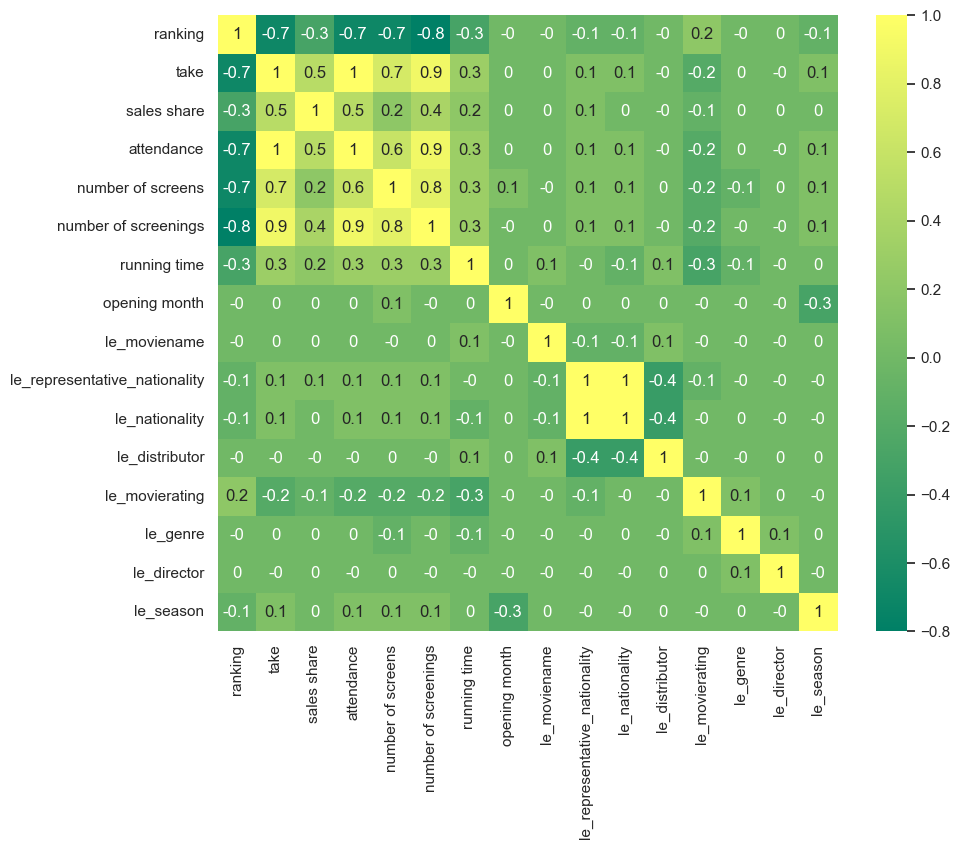

In [173]:
sns.set(rc={'figure.figsize':(10,8)})
sns.heatmap(data=corr_mat, annot=True, cmap='summer');

# take(매출액) 에 너무 큰 영향을 주는 관객수는 제외
# 대표국적과 국적은 서로를 너무 잘 설명함 >> 한개만 있어도 상관없음 대표국적만 남겨두고 국적은 삭제

- 매출액과 정의 상관관계가 있는 컬럼들 
    - 매출액 점유율(0.5)
    - 스크린 수(0.7)
    - 상영횟수(0.9)
    - 러닝타임(0.3)

- 매출액과 반비례인 컬럼
    - ranking(-0.7) = 랭킹이 적으면 적을수록 좋은것임

- 애초에 범주형 자료들을 라벨로 붙여도 상관 관계를 찾기 힘듬. 왜냐면 숫자가 커질수록 take가 증가하거나, 감소하지 않을것이기 때문


In [264]:
all_movies_encoder.columns

Index(['ranking', 'take', 'sales share', 'attendance', 'number of screens',
       'running time', 'opening month', 'le_moviename',
       'le_representative_nationality', 'le_nationality', 'le_distributor',
       'le_movierating', 'le_genre', 'le_director', 'le_season',
       'ss_number of screenings'],
      dtype='object')

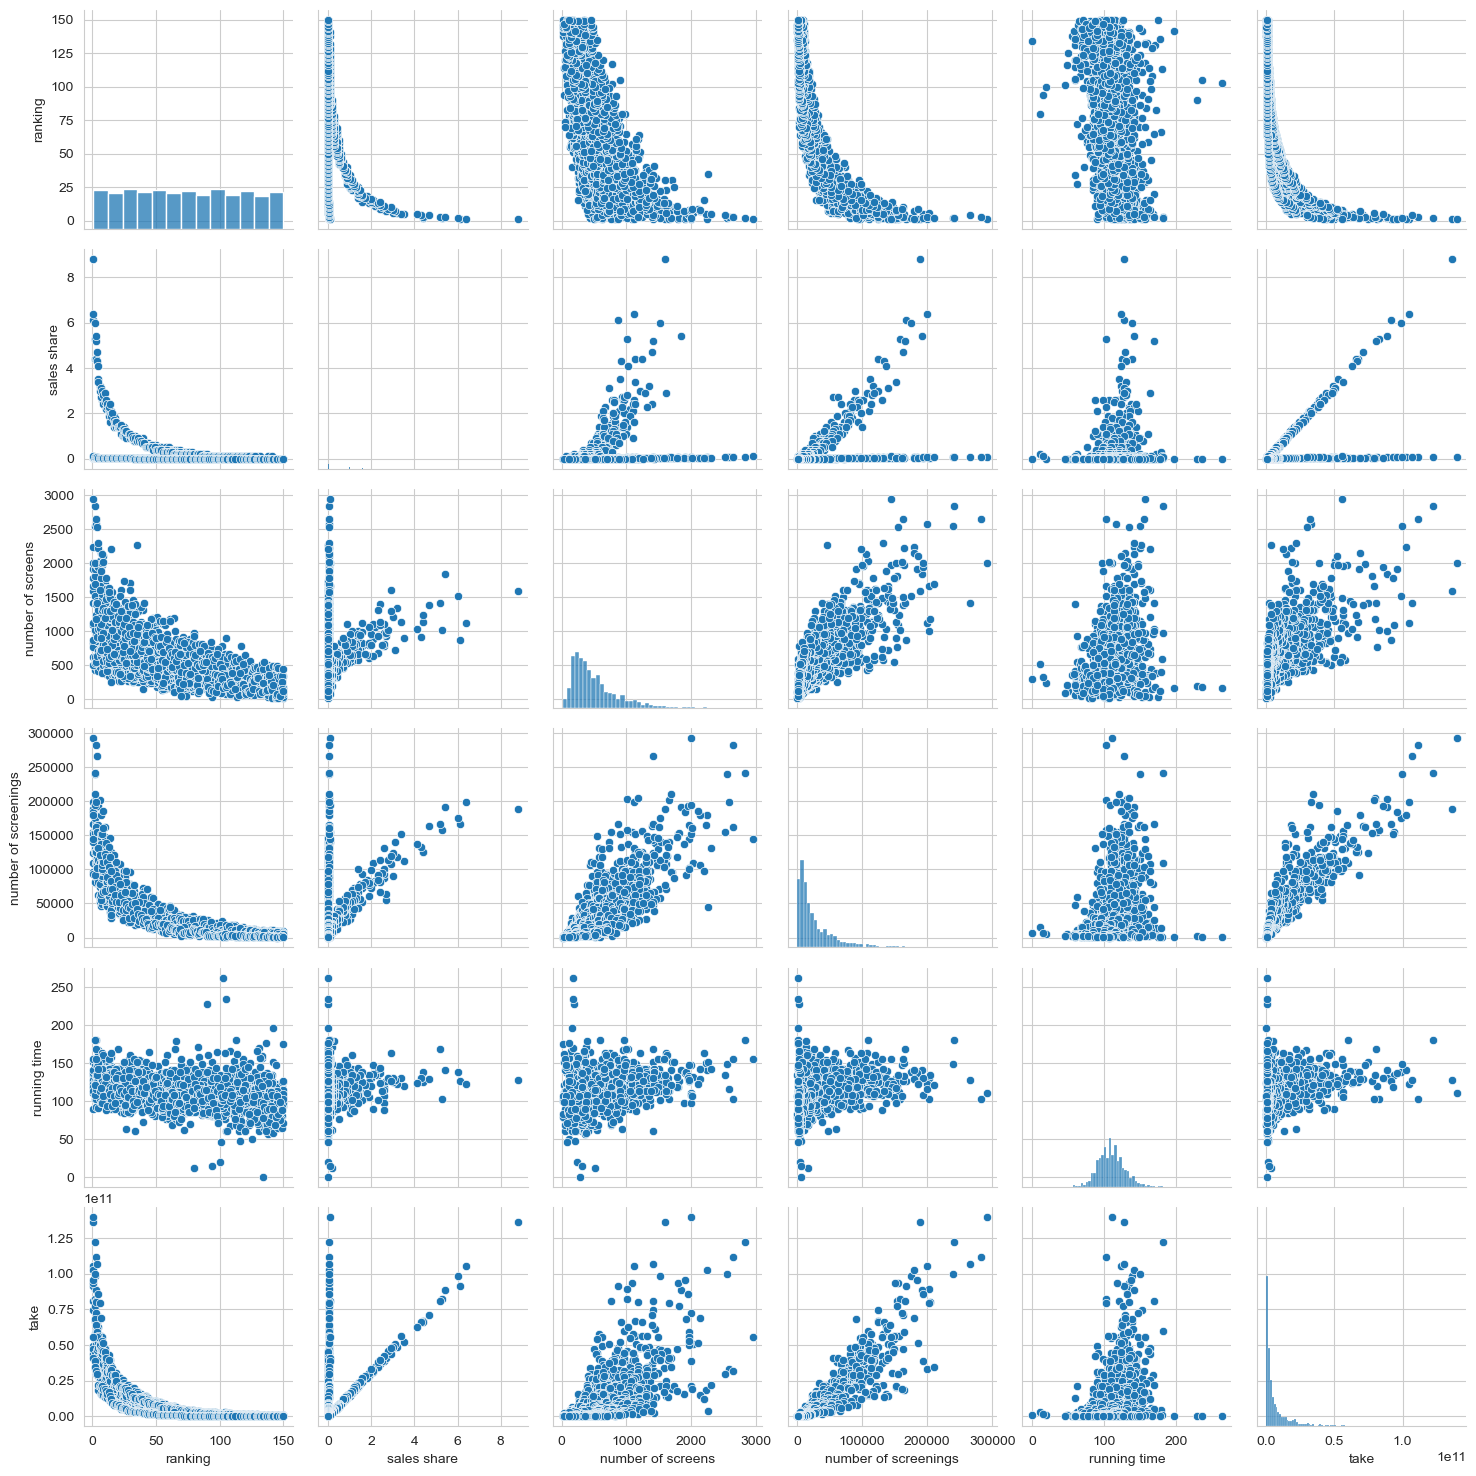

In [271]:
pair_col = all_movies_encoder[['ranking','sales share','number of screens','number of screenings','running time','take']]

sns.pairplot(pair_col)

<AxesSubplot:xlabel='running time', ylabel='take'>

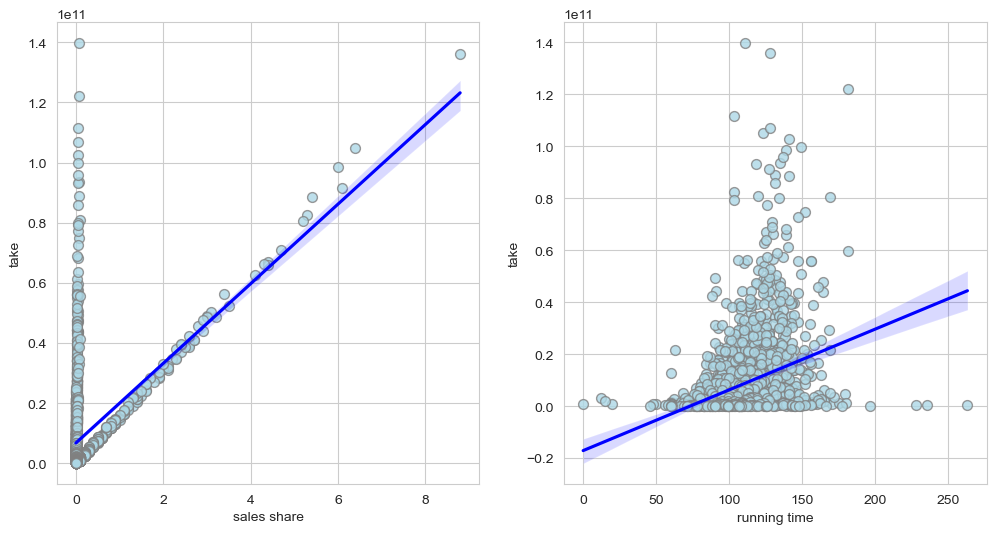

In [109]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")

plt.subplot(1,2,1)
sns.regplot(x ='sales share', y='take', data=all_movies_encoder, color='blue', scatter_kws={"fc":"lightblue", "ec":"gray", "s":50})
# plt.grid()

plt.subplot(1,2,2)
sns.regplot(x ='running time', y='take', data=all_movies_encoder , color='blue', scatter_kws={"fc":"lightblue", "ec":"gray", "s":50})
# plt.grid()

<AxesSubplot:xlabel='le_director', ylabel='take'>

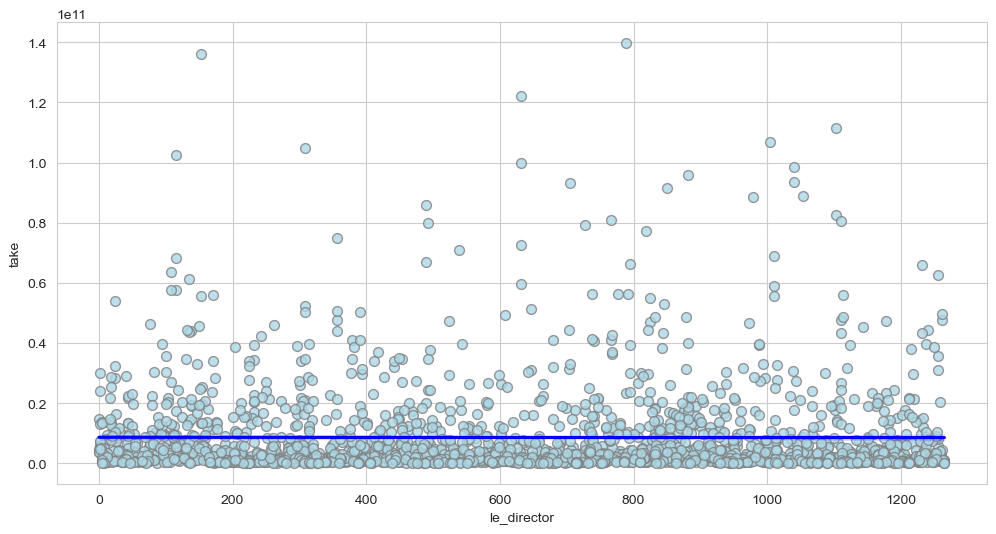

In [272]:
# 그렇다면 영화 감독은?
# 숫자로 메겼으므로 큰 숫자일수록 매출액이 높다 임을 증명할수가 없음

plt.figure(figsize=(12,6))
# plt.subplot(1,2,1)
sns.regplot(x ='le_director', y='take', data=all_movies_encoder, color='blue', scatter_kws={"fc":"lightblue", "ec":"gray", "s":50})



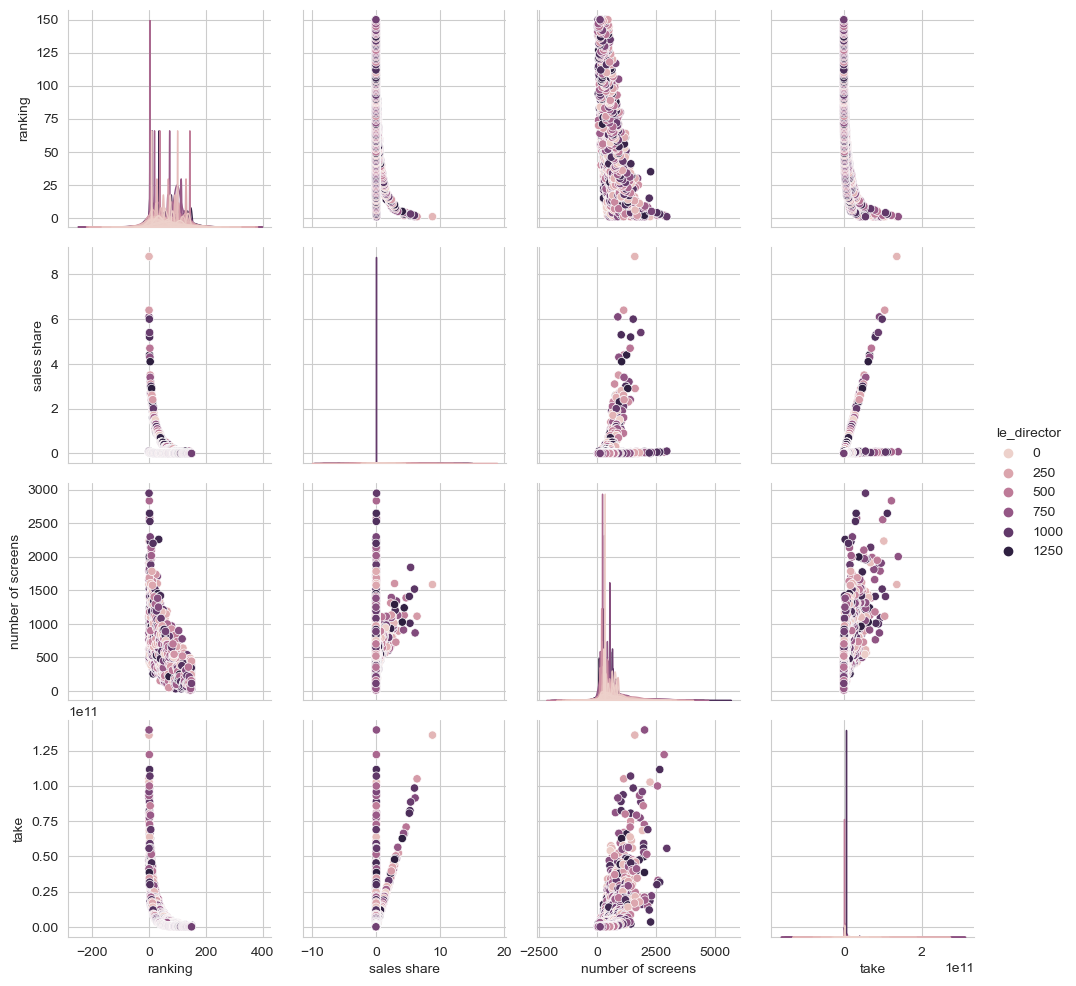

In [276]:
# 감독
pair_col = all_movies_encoder[['ranking','sales share','number of screens','take','le_director']]

sns.pairplot(pair_col, hue='le_director')

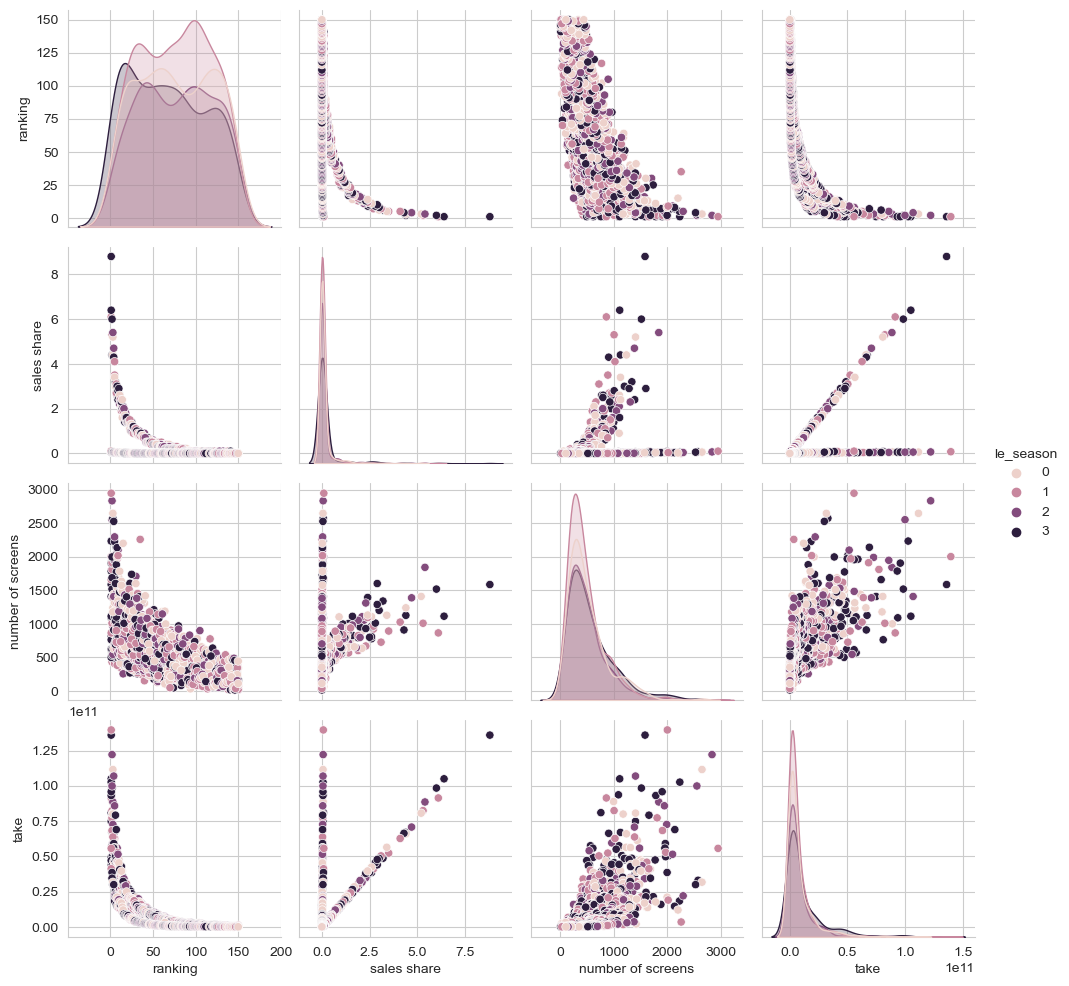

In [277]:
# 계절

pair_col = all_movies_encoder[['ranking','sales share','number of screens','take','le_season']]

sns.pairplot(pair_col, hue='le_season')

In [52]:
# features 수정
X = all_movies_encoder.drop(['attendance','le_nationality','take','opening date'], axis=1)
y = all_movies_encoder['take']

<AxesSubplot:ylabel='Fetures'>

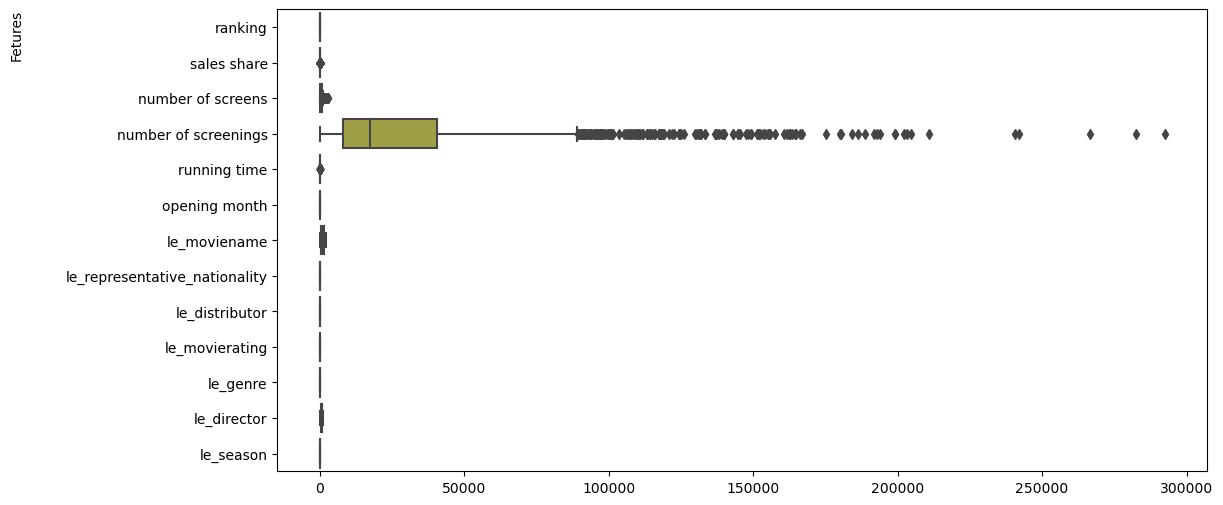

In [31]:
# boxplot 확인하기
# 상영횟수만 너무 범위가 큼 >> 일단 넣고 성능 테스트 후, 나중에 와서 상영횟수만 스케일링 해서 넣어 본 후 성능 테스트 해보기

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
# plt.xlabel( labelpad=30)
plt.ylabel('Fetures', labelpad=30, loc='top')
plt.rc('xtick', labelsize= 10)
# plt.xticks(rotation=90)

sns.boxplot(data=X, orient='h')

In [78]:
pd.options.display.float_format = '{:.1f}'.format

In [94]:
y

0      49339934700.0
1      47619379338.0
2      44098449600.0
3      29511658000.0
4      29133447500.0
            ...     
2080     135487000.0
2081      63593240.0
2082      89708920.0
2083      75381330.0
2084      78910570.0
Name: take, Length: 2085, dtype: float64

In [93]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2085 entries, 0 to 2084
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ranking                        2085 non-null   float64
 1   sales share                    2085 non-null   float64
 2   number of screens              2085 non-null   float64
 3   number of screenings           2085 non-null   float64
 4   running time                   2085 non-null   float64
 5   opening month                  2085 non-null   float64
 6   le_moviename                   2085 non-null   float64
 7   le_representative_nationality  2085 non-null   float64
 8   le_distributor                 2085 non-null   float64
 9   le_movierating                 2085 non-null   float64
 10  le_genre                       2085 non-null   float64
 11  le_director                    2085 non-null   float64
 12  le_season                      2085 non-null   f

In [95]:
# 데이터 나누기

from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=13)

In [96]:
X_train.shape , X_test.shape

((1668, 13), (417, 13))

In [97]:
# 머신러닝 만들기

# linear regression 모델 사용하기
# label을 붙여 학습시키고, output은 연속적인 값을 예상해야 하기 때문에

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train) # 학습

LinearRegression()

In [98]:
# 모델 평가하기 # rmse


import numpy as np
from sklearn.metrics import mean_squared_error

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))


print('RMSE of Train data : ', rmse_tr)
print('RMSE of Test data : ', rmse_test)


RMSE of Train data :  5269675030.333691
RMSE of Test data :  5245307945.902157


In [91]:
y_train

286      629017000.0
750    12735040000.0
1516    2531182700.0
664     1642407500.0
1232    1589433800.0
            ...     
153    29571255750.0
1780    2580213100.0
866    39602977500.0
74      2678629000.0
338     4529170675.0
Name: take, Length: 1668, dtype: float64

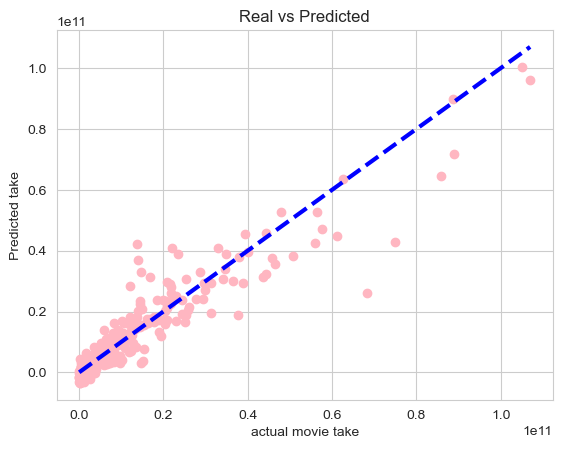

In [110]:
# 성능 확인

plt.scatter(y_test, pred_test, color='lightpink') # 실제값을 넣었을때 예상한 예상값
plt.xlabel('actual movie take')
plt.ylabel('Predicted take')
plt.title("Real vs Predicted")

plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], 'b', lw=3, ls='dashed') # 실제 값
plt.show()

In [113]:
all_movies_encoder['number of screenings']

0      96434.0
1      92291.0
2      96522.0
3      79966.0
4      78007.0
         ...  
2080    1126.0
2081     708.0
2082     728.0
2083    2032.0
2084    1114.0
Name: number of screenings, Length: 2085, dtype: float64

In [115]:
# 스크린 수 scaling 해보기

from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

all_movies_encoder['ss_number of screenings'] = ss.fit_transform(all_movies_encoder['number of screenings'].values.reshape(-1,1))


In [117]:
all_movies_encoder = all_movies_encoder.drop(['number of screenings'], axis=1)


<AxesSubplot:ylabel='Fetures'>

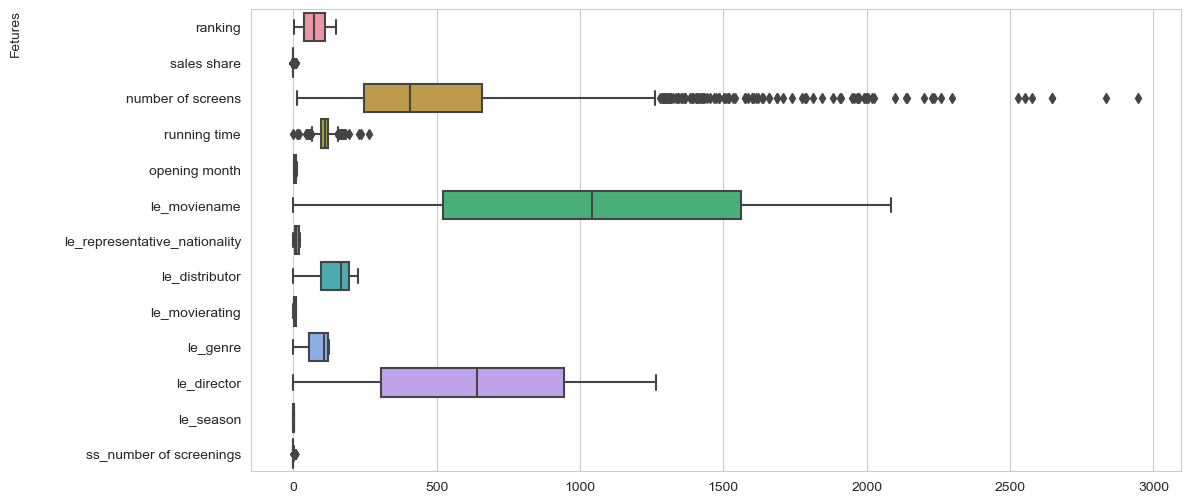

In [124]:
# boxplot 재확인하기

data = all_movies_encoder.drop(['attendance','le_nationality','take'], axis=1)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
# plt.xlabel( labelpad=30)
plt.ylabel('Fetures', labelpad=30, loc='top')
plt.rc('xtick', labelsize= 10)
# plt.xticks(rotation=90)

sns.boxplot(data=data, orient='h')

In [127]:
# 데이터 나누기
X = all_movies_encoder.drop(['attendance','le_nationality','take'], axis=1)
y = all_movies_encoder['take']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=13)

# 선형 회귀 모델 호출 
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train,y_train) # 학습

# 성능검사

pred_tr = reg.predict(X_train)
pred_test = reg.predict(X_test)

rmse_tr = np.sqrt(mean_squared_error(y_train, pred_tr))
rmse_test = np.sqrt(mean_squared_error(y_test, pred_test))


print('RMSE of Train data : ', rmse_tr)
print('RMSE of Test data : ', rmse_test)

# 스케일링 전이랑 상관이 없다

RMSE of Train data :  5269675030.333693
RMSE of Test data :  5245307945.902434


In [171]:
encoder_dic

{1: '영화명', 2: '대표국적', 3: '국적', 4: '배급사', 5: '연령등급', 6: '장르', 7: '감독', 8: '계절'}

In [247]:
all_movies[all_movies['영화명']=='애나벨']

,순위,영화명,개봉일,매출액,매출액 점유율,관객수,스크린수,상영횟수,대표국적,국적,...,개봉월,계절,le_영화명,le_대표국적,le_국적,le_배급사,le_연령등급,le_장르,le_감독,le_계절
1048,51,애나벨,2014-10-02,7083492943,0.50000,926027,464,29000,미국,미국,...,10,가을,1291,6,33,196,3,40,634,0


In [250]:
movie =['애나벨']
le_1.transform(movie)

array([1291])

In [174]:
# 봉준호 감독이 애나벨을 디렉팅 한다면

director =['봉준호']
le_7.transform(director)

array([489])

In [178]:
X

,ranking,sales share,number of screens,running time,opening month,le_moviename,le_representative_nationality,le_distributor,le_movierating,le_genre,le_director,le_season,ss_number of screenings
0,1.0,0.1,622.0,90.0,8.0,532.0,21.0,69.0,2.0,126.0,607.0,3.0,1.8
1,2.0,0.1,863.0,135.0,6.0,1848.0,6.0,155.0,2.0,0.0,356.0,3.0,1.7
2,3.0,0.0,551.0,125.0,7.0,2058.0,21.0,155.0,2.0,55.0,138.0,3.0,1.8
3,4.0,0.0,806.0,139.0,5.0,1159.0,6.0,225.0,2.0,0.0,524.0,2.0,1.4
4,5.0,0.0,953.0,168.0,5.0,1723.0,6.0,225.0,2.0,126.0,40.0,2.0,1.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2080,144.0,0.0,63.0,148.0,2.0,1559.0,21.0,5.0,10.0,39.0,833.0,1.0,-0.8
2081,145.0,0.0,69.0,107.0,9.0,967.0,11.0,125.0,3.0,80.0,526.0,0.0,-0.8
2082,147.0,0.0,37.0,99.0,12.0,1802.0,24.0,33.0,3.0,55.0,732.0,1.0,-0.8
2083,149.0,0.0,154.0,125.0,4.0,1494.0,6.0,196.0,3.0,55.0,528.0,2.0,-0.8


In [196]:
X.iloc[1,:]

ranking                            2.0
sales share                        0.1
number of screens                863.0
running time                     135.0
opening month                      6.0
le_moviename                    1848.0
le_representative_nationality      6.0
le_distributor                   155.0
le_movierating                     2.0
le_genre                           0.0
le_director                      356.0
le_season                          3.0
ss_number of screenings            1.7
Name: 1, dtype: float64

In [228]:
import numpy as np

  # 과학적 표기법 대신 소수점 6자리까지 나타낸다.
np.set_printoptions(precision=6, suppress=True)

In [251]:
a = np.array([2.0,  0.052,863.0,  135.0, 6.0,  1291,  6.0, 155.0,  2.0,  0.0,   489.0,3.0,  1.712798030296005])
a 

array([   2.      ,    0.052   ,  863.      ,  135.      ,    6.      ,
       1291.      ,    6.      ,  155.      ,    2.      ,    0.      ,
        489.      ,    3.      ,    1.712798])

In [254]:
a = np.array([2.0,  0.052,863.0,  135.0, 6.0,  1291,  6.0, 155.0,  2.0,  0.0,   607.0,3.0,  1.712798030296005])
a 

array([   2.      ,    0.052   ,  863.      ,  135.      ,    6.      ,
       1291.      ,    6.      ,  155.      ,    2.      ,    0.      ,
        607.      ,    3.      ,    1.712798])

In [255]:
pred = reg.predict([a]) # 2차원으로 만들기 a.reshape(1,13)
pred

c:\Users\mg457\miniconda3\envs\ds_study2\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.996332e+10])

In [256]:
# t = 3.000e-05
# t = '{:.9f}'.format(t)
# print(t)
t = 2.996332e+10
t = '{:.9f}'.format(t)
print(t)

29963320000.000000000
